<a href="https://colab.research.google.com/github/bbishop3/helloAI/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import time
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# create and train a pytorch digit classifier
# source: chatgpt with the prompt "create a pytorch mnist digit classifier"
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Set device to either CUDA or CPU
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda")

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        x = nn.functional.relu(nn.functional.max_pool2d(self.dropout(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

# Load the MNIST dataset and apply transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_set = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('../data', train=False, download=True, transform=transform)

# Set batch size and create data loaders
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Create an instance of the model and send it to the device
model = Net().to(device)

# Define the optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

# Train the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

100%|██████████| 9912422/9912422 [00:00<00:00, 72642265.88it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 69658248.32it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28854085.14it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15602398.66it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Train Epoch: 0 [0/60000 (0%)]	Loss: 2.300017
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.579461
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.457336
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.325874
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.576557
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.155316
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.210522
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.329117
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.130754
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.271754
Test set: Average loss: 0.0023, Accuracy: 9529/10000 (95%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.379187
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.080714
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.251044
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.144276
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.074488
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.260344
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.107770
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.433993
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.214793
Tr

Epoch [1/100] Batch [1/469] Discriminator Loss: 1.4339 Generator Loss: 0.6924
Epoch [1/100] Batch [101/469] Discriminator Loss: 0.3222 Generator Loss: 2.0791
Epoch [1/100] Batch [201/469] Discriminator Loss: 0.7649 Generator Loss: 1.2296
Epoch [1/100] Batch [301/469] Discriminator Loss: 0.9804 Generator Loss: 0.8813
Epoch [1/100] Batch [401/469] Discriminator Loss: 1.2272 Generator Loss: 0.5634


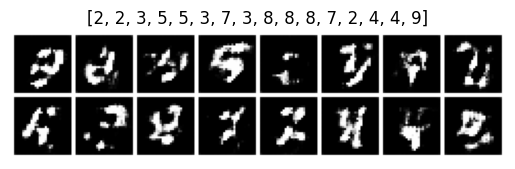

average prediction confidence over 1000 predictions: 0.4238600730895996
cumulative prediction counts: [68, 22, 166, 273, 84, 70, 24, 88, 154, 51]
epoch time: 17.30381202697754, total time: 17.30381202697754
Epoch [2/100] Batch [1/469] Discriminator Loss: 1.2099 Generator Loss: 1.2760
Epoch [2/100] Batch [101/469] Discriminator Loss: 1.1683 Generator Loss: 1.2276
Epoch [2/100] Batch [201/469] Discriminator Loss: 1.1249 Generator Loss: 0.8115
Epoch [2/100] Batch [301/469] Discriminator Loss: 1.0906 Generator Loss: 1.1703
Epoch [2/100] Batch [401/469] Discriminator Loss: 1.2188 Generator Loss: 0.5408


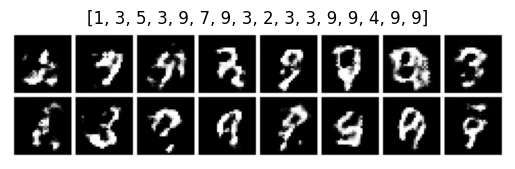

average prediction confidence over 1000 predictions: 0.4478040635585785
cumulative prediction counts: [112, 45, 267, 518, 135, 196, 80, 142, 271, 234]
epoch time: 18.597023725509644, total time: 35.90083575248718
Epoch [3/100] Batch [1/469] Discriminator Loss: 1.0181 Generator Loss: 1.2811
Epoch [3/100] Batch [101/469] Discriminator Loss: 1.0429 Generator Loss: 1.2534
Epoch [3/100] Batch [201/469] Discriminator Loss: 0.9678 Generator Loss: 0.9457
Epoch [3/100] Batch [301/469] Discriminator Loss: 0.9762 Generator Loss: 0.9046
Epoch [3/100] Batch [401/469] Discriminator Loss: 0.9505 Generator Loss: 1.0091


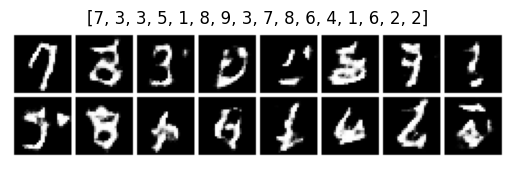

average prediction confidence over 1000 predictions: 0.48707467317581177
cumulative prediction counts: [165, 106, 337, 739, 226, 263, 148, 275, 374, 367]
epoch time: 17.703075885772705, total time: 53.60391163825989
Epoch [4/100] Batch [1/469] Discriminator Loss: 1.0050 Generator Loss: 0.9559
Epoch [4/100] Batch [101/469] Discriminator Loss: 1.1077 Generator Loss: 1.4051
Epoch [4/100] Batch [201/469] Discriminator Loss: 1.1373 Generator Loss: 0.6235
Epoch [4/100] Batch [301/469] Discriminator Loss: 1.0610 Generator Loss: 1.2028
Epoch [4/100] Batch [401/469] Discriminator Loss: 1.0873 Generator Loss: 0.8118


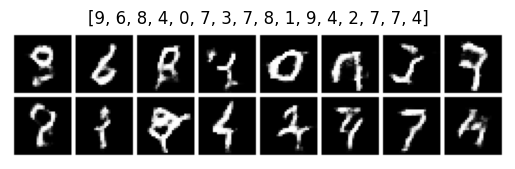

average prediction confidence over 1000 predictions: 0.5226845741271973
cumulative prediction counts: [232, 167, 427, 903, 342, 315, 224, 431, 477, 482]
epoch time: 17.4765202999115, total time: 71.08043193817139
Epoch [5/100] Batch [1/469] Discriminator Loss: 1.1188 Generator Loss: 0.8200
Epoch [5/100] Batch [101/469] Discriminator Loss: 1.1079 Generator Loss: 0.8022
Epoch [5/100] Batch [201/469] Discriminator Loss: 1.2136 Generator Loss: 0.5747
Epoch [5/100] Batch [301/469] Discriminator Loss: 1.0899 Generator Loss: 0.7610
Epoch [5/100] Batch [401/469] Discriminator Loss: 1.0978 Generator Loss: 0.9435


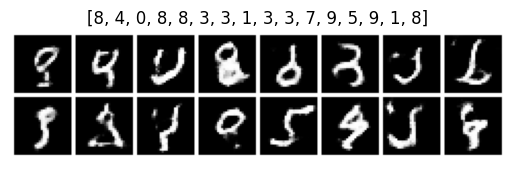

average prediction confidence over 1000 predictions: 0.5409319400787354
cumulative prediction counts: [306, 222, 517, 1061, 436, 395, 302, 566, 569, 626]
epoch time: 17.10985803604126, total time: 88.19028997421265
Epoch [6/100] Batch [1/469] Discriminator Loss: 1.1592 Generator Loss: 1.2844
Epoch [6/100] Batch [101/469] Discriminator Loss: 1.1121 Generator Loss: 0.8649
Epoch [6/100] Batch [201/469] Discriminator Loss: 1.2816 Generator Loss: 0.5573
Epoch [6/100] Batch [301/469] Discriminator Loss: 1.1249 Generator Loss: 1.0718
Epoch [6/100] Batch [401/469] Discriminator Loss: 1.1127 Generator Loss: 0.8183


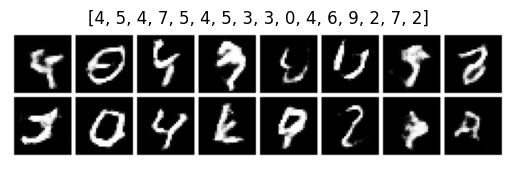

average prediction confidence over 1000 predictions: 0.5410098433494568
cumulative prediction counts: [378, 291, 610, 1197, 534, 478, 365, 697, 672, 778]
epoch time: 17.21473979949951, total time: 105.40502977371216
Epoch [7/100] Batch [1/469] Discriminator Loss: 1.2246 Generator Loss: 0.5899
Epoch [7/100] Batch [101/469] Discriminator Loss: 1.1035 Generator Loss: 0.9175
Epoch [7/100] Batch [201/469] Discriminator Loss: 1.1849 Generator Loss: 1.1901
Epoch [7/100] Batch [301/469] Discriminator Loss: 1.1601 Generator Loss: 0.6900
Epoch [7/100] Batch [401/469] Discriminator Loss: 1.1434 Generator Loss: 1.0787


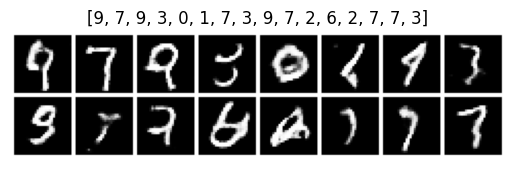

average prediction confidence over 1000 predictions: 0.5541476607322693
cumulative prediction counts: [465, 344, 706, 1344, 615, 588, 436, 817, 761, 924]
epoch time: 17.44971489906311, total time: 122.85474467277527
Epoch [8/100] Batch [1/469] Discriminator Loss: 1.0708 Generator Loss: 1.0376
Epoch [8/100] Batch [101/469] Discriminator Loss: 1.0738 Generator Loss: 0.8764
Epoch [8/100] Batch [201/469] Discriminator Loss: 1.1059 Generator Loss: 0.8260
Epoch [8/100] Batch [301/469] Discriminator Loss: 1.1251 Generator Loss: 0.7306
Epoch [8/100] Batch [401/469] Discriminator Loss: 1.0977 Generator Loss: 1.1894


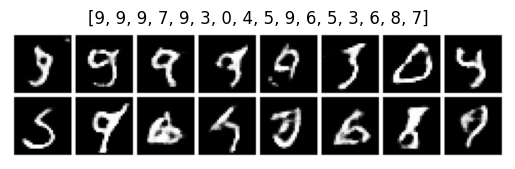

average prediction confidence over 1000 predictions: 0.5395269989967346
cumulative prediction counts: [546, 424, 798, 1495, 703, 701, 497, 941, 840, 1055]
epoch time: 17.219995498657227, total time: 140.0747401714325
Epoch [9/100] Batch [1/469] Discriminator Loss: 1.0846 Generator Loss: 1.2794
Epoch [9/100] Batch [101/469] Discriminator Loss: 1.0428 Generator Loss: 0.8848
Epoch [9/100] Batch [201/469] Discriminator Loss: 1.1352 Generator Loss: 1.2353
Epoch [9/100] Batch [301/469] Discriminator Loss: 1.0775 Generator Loss: 1.3297
Epoch [9/100] Batch [401/469] Discriminator Loss: 1.1129 Generator Loss: 1.3779


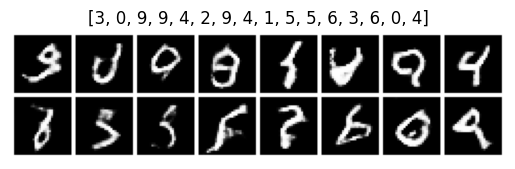

average prediction confidence over 1000 predictions: 0.5357804298400879
cumulative prediction counts: [639, 493, 884, 1641, 772, 809, 558, 1065, 939, 1200]
epoch time: 16.919090747833252, total time: 156.99383091926575
Epoch [10/100] Batch [1/469] Discriminator Loss: 1.0102 Generator Loss: 0.9881
Epoch [10/100] Batch [101/469] Discriminator Loss: 1.0385 Generator Loss: 1.1498
Epoch [10/100] Batch [201/469] Discriminator Loss: 1.0272 Generator Loss: 0.7884
Epoch [10/100] Batch [301/469] Discriminator Loss: 1.0110 Generator Loss: 0.8594
Epoch [10/100] Batch [401/469] Discriminator Loss: 1.1709 Generator Loss: 1.5523


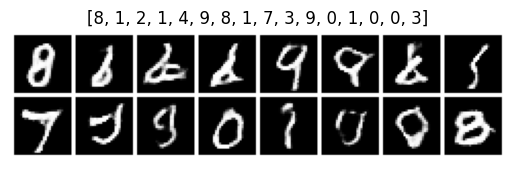

average prediction confidence over 1000 predictions: 0.5449380278587341
cumulative prediction counts: [734, 550, 957, 1782, 855, 916, 623, 1192, 1035, 1356]
epoch time: 17.114421606063843, total time: 174.1082525253296
Epoch [11/100] Batch [1/469] Discriminator Loss: 1.0705 Generator Loss: 0.8529
Epoch [11/100] Batch [101/469] Discriminator Loss: 0.9636 Generator Loss: 1.0780
Epoch [11/100] Batch [201/469] Discriminator Loss: 0.9809 Generator Loss: 1.0730
Epoch [11/100] Batch [301/469] Discriminator Loss: 1.0049 Generator Loss: 1.2706
Epoch [11/100] Batch [401/469] Discriminator Loss: 0.9524 Generator Loss: 0.8632


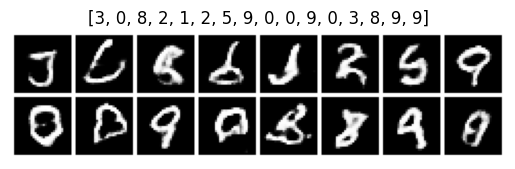

average prediction confidence over 1000 predictions: 0.5578709840774536
cumulative prediction counts: [821, 612, 1039, 1926, 927, 1008, 681, 1339, 1140, 1507]
epoch time: 16.64767074584961, total time: 190.7559232711792
Epoch [12/100] Batch [1/469] Discriminator Loss: 0.9738 Generator Loss: 0.9898
Epoch [12/100] Batch [101/469] Discriminator Loss: 1.0783 Generator Loss: 1.3195
Epoch [12/100] Batch [201/469] Discriminator Loss: 1.0238 Generator Loss: 1.3233
Epoch [12/100] Batch [301/469] Discriminator Loss: 1.1544 Generator Loss: 0.5930
Epoch [12/100] Batch [401/469] Discriminator Loss: 0.9924 Generator Loss: 0.9977


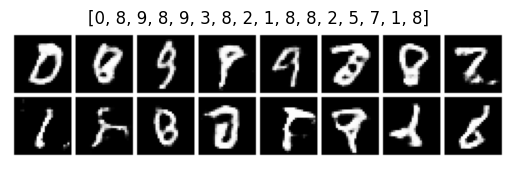

average prediction confidence over 1000 predictions: 0.5515819787979126
cumulative prediction counts: [906, 679, 1121, 2081, 1017, 1105, 749, 1474, 1231, 1637]
epoch time: 17.70437240600586, total time: 208.46029567718506
Epoch [13/100] Batch [1/469] Discriminator Loss: 0.9217 Generator Loss: 1.2551
Epoch [13/100] Batch [101/469] Discriminator Loss: 0.9204 Generator Loss: 1.1983
Epoch [13/100] Batch [201/469] Discriminator Loss: 0.9924 Generator Loss: 1.3972
Epoch [13/100] Batch [301/469] Discriminator Loss: 0.9424 Generator Loss: 1.3657
Epoch [13/100] Batch [401/469] Discriminator Loss: 1.0861 Generator Loss: 1.8790


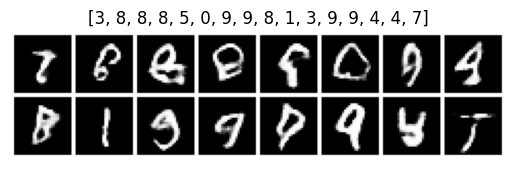

average prediction confidence over 1000 predictions: 0.5531776547431946
cumulative prediction counts: [1004, 733, 1198, 2220, 1095, 1200, 806, 1602, 1351, 1791]
epoch time: 17.86186647415161, total time: 226.32216215133667
Epoch [14/100] Batch [1/469] Discriminator Loss: 0.9458 Generator Loss: 1.3585
Epoch [14/100] Batch [101/469] Discriminator Loss: 0.8862 Generator Loss: 1.1257
Epoch [14/100] Batch [201/469] Discriminator Loss: 0.9836 Generator Loss: 0.8803
Epoch [14/100] Batch [301/469] Discriminator Loss: 0.9818 Generator Loss: 0.8959
Epoch [14/100] Batch [401/469] Discriminator Loss: 0.9819 Generator Loss: 1.2649


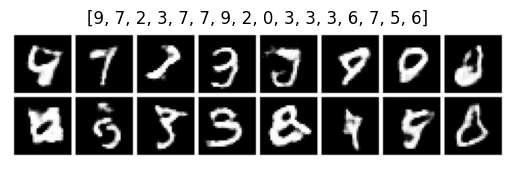

average prediction confidence over 1000 predictions: 0.5510858297348022
cumulative prediction counts: [1097, 787, 1270, 2386, 1162, 1299, 869, 1733, 1442, 1955]
epoch time: 16.964954376220703, total time: 243.28711652755737
Epoch [15/100] Batch [1/469] Discriminator Loss: 0.9730 Generator Loss: 1.5943
Epoch [15/100] Batch [101/469] Discriminator Loss: 1.0047 Generator Loss: 0.8609
Epoch [15/100] Batch [201/469] Discriminator Loss: 1.0079 Generator Loss: 1.4671
Epoch [15/100] Batch [301/469] Discriminator Loss: 0.8504 Generator Loss: 1.4350
Epoch [15/100] Batch [401/469] Discriminator Loss: 0.9389 Generator Loss: 1.3153


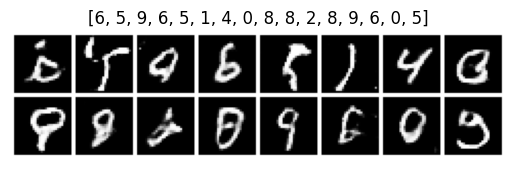

average prediction confidence over 1000 predictions: 0.5626630187034607
cumulative prediction counts: [1202, 856, 1340, 2533, 1233, 1402, 934, 1868, 1534, 2098]
epoch time: 17.336264610290527, total time: 260.6233811378479
Epoch [16/100] Batch [1/469] Discriminator Loss: 1.0405 Generator Loss: 1.8631
Epoch [16/100] Batch [101/469] Discriminator Loss: 0.9280 Generator Loss: 1.3635
Epoch [16/100] Batch [201/469] Discriminator Loss: 0.9520 Generator Loss: 1.2969
Epoch [16/100] Batch [301/469] Discriminator Loss: 0.8928 Generator Loss: 1.1830
Epoch [16/100] Batch [401/469] Discriminator Loss: 0.8216 Generator Loss: 1.4405


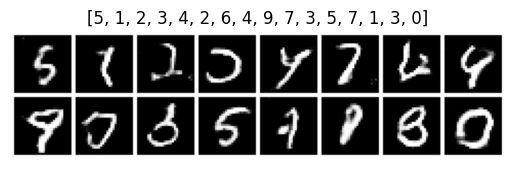

average prediction confidence over 1000 predictions: 0.5520601272583008
cumulative prediction counts: [1297, 939, 1424, 2681, 1326, 1488, 987, 1993, 1623, 2242]
epoch time: 16.489386796951294, total time: 277.1127679347992
Epoch [17/100] Batch [1/469] Discriminator Loss: 0.9009 Generator Loss: 1.2043
Epoch [17/100] Batch [101/469] Discriminator Loss: 0.8669 Generator Loss: 1.2902
Epoch [17/100] Batch [201/469] Discriminator Loss: 0.9168 Generator Loss: 1.4477
Epoch [17/100] Batch [301/469] Discriminator Loss: 0.8820 Generator Loss: 1.3642
Epoch [17/100] Batch [401/469] Discriminator Loss: 0.9506 Generator Loss: 1.7985


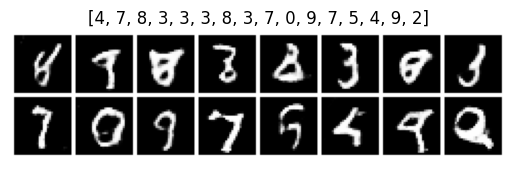

average prediction confidence over 1000 predictions: 0.5531714558601379
cumulative prediction counts: [1399, 1000, 1505, 2851, 1370, 1556, 1042, 2152, 1735, 2390]
epoch time: 17.217492818832397, total time: 294.3302607536316
Epoch [18/100] Batch [1/469] Discriminator Loss: 0.9087 Generator Loss: 0.9091
Epoch [18/100] Batch [101/469] Discriminator Loss: 1.0186 Generator Loss: 1.8672
Epoch [18/100] Batch [201/469] Discriminator Loss: 0.9071 Generator Loss: 1.5086
Epoch [18/100] Batch [301/469] Discriminator Loss: 0.8385 Generator Loss: 1.3146
Epoch [18/100] Batch [401/469] Discriminator Loss: 0.9015 Generator Loss: 1.1864


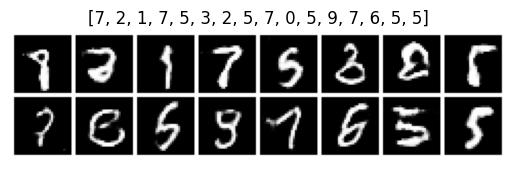

average prediction confidence over 1000 predictions: 0.5601130723953247
cumulative prediction counts: [1514, 1062, 1598, 2998, 1428, 1643, 1088, 2306, 1833, 2530]
epoch time: 16.62614893913269, total time: 310.9564096927643
Epoch [19/100] Batch [1/469] Discriminator Loss: 0.9250 Generator Loss: 2.0036
Epoch [19/100] Batch [101/469] Discriminator Loss: 1.0059 Generator Loss: 0.8622
Epoch [19/100] Batch [201/469] Discriminator Loss: 0.8814 Generator Loss: 1.5756
Epoch [19/100] Batch [301/469] Discriminator Loss: 0.8304 Generator Loss: 1.2872
Epoch [19/100] Batch [401/469] Discriminator Loss: 0.8563 Generator Loss: 0.9066


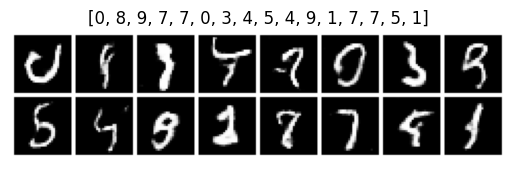

average prediction confidence over 1000 predictions: 0.5607324838638306
cumulative prediction counts: [1627, 1135, 1674, 3144, 1492, 1718, 1130, 2456, 1949, 2675]
epoch time: 17.038591861724854, total time: 327.99500155448914
Epoch [20/100] Batch [1/469] Discriminator Loss: 0.8533 Generator Loss: 1.3055
Epoch [20/100] Batch [101/469] Discriminator Loss: 0.9302 Generator Loss: 0.7588
Epoch [20/100] Batch [201/469] Discriminator Loss: 0.8723 Generator Loss: 1.3750
Epoch [20/100] Batch [301/469] Discriminator Loss: 0.8038 Generator Loss: 1.5189
Epoch [20/100] Batch [401/469] Discriminator Loss: 1.0312 Generator Loss: 1.9773


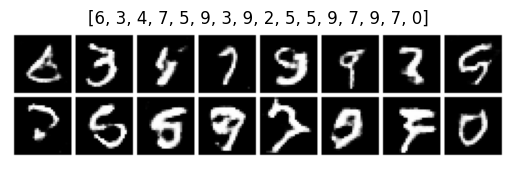

average prediction confidence over 1000 predictions: 0.5380697250366211
cumulative prediction counts: [1736, 1202, 1746, 3303, 1546, 1812, 1175, 2593, 2061, 2826]
epoch time: 17.113429307937622, total time: 345.10843086242676
Epoch [21/100] Batch [1/469] Discriminator Loss: 0.8583 Generator Loss: 1.1153
Epoch [21/100] Batch [101/469] Discriminator Loss: 0.8396 Generator Loss: 1.5367
Epoch [21/100] Batch [201/469] Discriminator Loss: 0.9212 Generator Loss: 1.1789
Epoch [21/100] Batch [301/469] Discriminator Loss: 1.0834 Generator Loss: 2.1107
Epoch [21/100] Batch [401/469] Discriminator Loss: 0.7778 Generator Loss: 1.0583


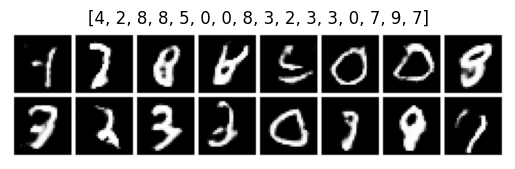

average prediction confidence over 1000 predictions: 0.5713481307029724
cumulative prediction counts: [1847, 1264, 1829, 3451, 1613, 1917, 1229, 2723, 2167, 2960]
epoch time: 16.793057918548584, total time: 361.90148878097534
Epoch [22/100] Batch [1/469] Discriminator Loss: 0.7858 Generator Loss: 1.6080
Epoch [22/100] Batch [101/469] Discriminator Loss: 0.8159 Generator Loss: 1.6679
Epoch [22/100] Batch [201/469] Discriminator Loss: 0.8619 Generator Loss: 1.4313
Epoch [22/100] Batch [301/469] Discriminator Loss: 0.9476 Generator Loss: 1.8552
Epoch [22/100] Batch [401/469] Discriminator Loss: 0.8503 Generator Loss: 1.0287


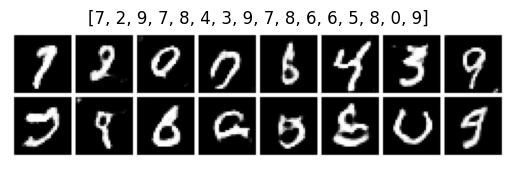

average prediction confidence over 1000 predictions: 0.5665003657341003
cumulative prediction counts: [1964, 1327, 1906, 3576, 1677, 2021, 1280, 2897, 2265, 3087]
epoch time: 16.626049757003784, total time: 378.5275385379791
Epoch [23/100] Batch [1/469] Discriminator Loss: 0.8991 Generator Loss: 1.1994
Epoch [23/100] Batch [101/469] Discriminator Loss: 0.8322 Generator Loss: 1.7761
Epoch [23/100] Batch [201/469] Discriminator Loss: 0.7958 Generator Loss: 1.3909
Epoch [23/100] Batch [301/469] Discriminator Loss: 0.8424 Generator Loss: 1.3533
Epoch [23/100] Batch [401/469] Discriminator Loss: 0.8281 Generator Loss: 1.6041


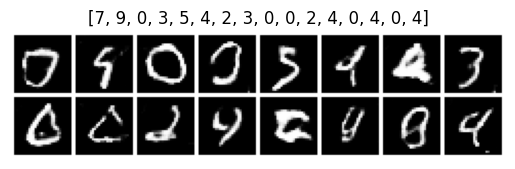

average prediction confidence over 1000 predictions: 0.5705629587173462
cumulative prediction counts: [2089, 1393, 1987, 3716, 1744, 2101, 1332, 3027, 2382, 3229]
epoch time: 17.03432607650757, total time: 395.5618646144867
Epoch [24/100] Batch [1/469] Discriminator Loss: 0.8074 Generator Loss: 1.8270
Epoch [24/100] Batch [101/469] Discriminator Loss: 1.0435 Generator Loss: 2.4849
Epoch [24/100] Batch [201/469] Discriminator Loss: 0.9892 Generator Loss: 1.0426
Epoch [24/100] Batch [301/469] Discriminator Loss: 0.8648 Generator Loss: 2.3749
Epoch [24/100] Batch [401/469] Discriminator Loss: 0.8508 Generator Loss: 1.0569


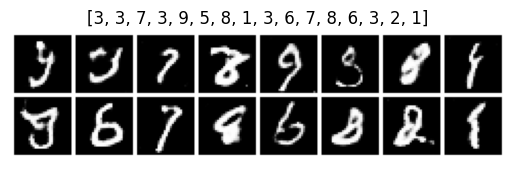

average prediction confidence over 1000 predictions: 0.5617513060569763
cumulative prediction counts: [2213, 1456, 2069, 3850, 1815, 2183, 1369, 3189, 2497, 3359]
epoch time: 16.27643084526062, total time: 411.8382954597473
Epoch [25/100] Batch [1/469] Discriminator Loss: 0.8340 Generator Loss: 1.1123
Epoch [25/100] Batch [101/469] Discriminator Loss: 0.9319 Generator Loss: 0.7952
Epoch [25/100] Batch [201/469] Discriminator Loss: 0.7937 Generator Loss: 1.2105
Epoch [25/100] Batch [301/469] Discriminator Loss: 0.7700 Generator Loss: 1.2035
Epoch [25/100] Batch [401/469] Discriminator Loss: 0.8117 Generator Loss: 1.2112


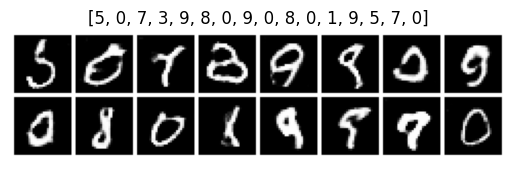

average prediction confidence over 1000 predictions: 0.5746782422065735
cumulative prediction counts: [2344, 1534, 2154, 3984, 1873, 2246, 1408, 3342, 2613, 3502]
epoch time: 17.327508687973022, total time: 429.16580414772034
Epoch [26/100] Batch [1/469] Discriminator Loss: 1.2133 Generator Loss: 2.5754
Epoch [26/100] Batch [101/469] Discriminator Loss: 0.7990 Generator Loss: 2.1076
Epoch [26/100] Batch [201/469] Discriminator Loss: 0.8303 Generator Loss: 1.4539
Epoch [26/100] Batch [301/469] Discriminator Loss: 0.8262 Generator Loss: 1.4922
Epoch [26/100] Batch [401/469] Discriminator Loss: 0.9029 Generator Loss: 2.0041


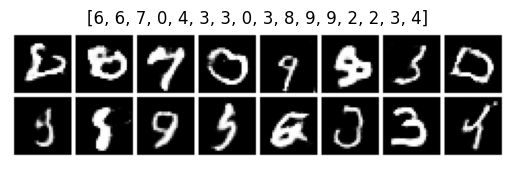

average prediction confidence over 1000 predictions: 0.561482310295105
cumulative prediction counts: [2469, 1597, 2234, 4131, 1949, 2328, 1449, 3504, 2712, 3627]
epoch time: 16.76094913482666, total time: 445.926753282547
Epoch [27/100] Batch [1/469] Discriminator Loss: 0.7280 Generator Loss: 1.8675
Epoch [27/100] Batch [101/469] Discriminator Loss: 0.8367 Generator Loss: 1.5886
Epoch [27/100] Batch [201/469] Discriminator Loss: 0.7172 Generator Loss: 1.4425
Epoch [27/100] Batch [301/469] Discriminator Loss: 1.0464 Generator Loss: 2.6192
Epoch [27/100] Batch [401/469] Discriminator Loss: 0.8912 Generator Loss: 0.9558


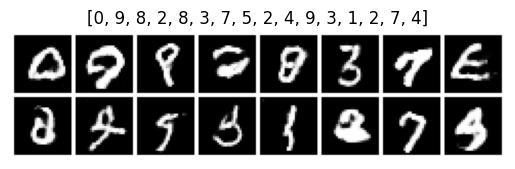

average prediction confidence over 1000 predictions: 0.5639451742172241
cumulative prediction counts: [2578, 1664, 2314, 4254, 2024, 2410, 1487, 3666, 2830, 3773]
epoch time: 16.17120099067688, total time: 462.0979542732239
Epoch [28/100] Batch [1/469] Discriminator Loss: 0.7733 Generator Loss: 1.4299
Epoch [28/100] Batch [101/469] Discriminator Loss: 0.8234 Generator Loss: 1.1466
Epoch [28/100] Batch [201/469] Discriminator Loss: 0.7214 Generator Loss: 1.6938
Epoch [28/100] Batch [301/469] Discriminator Loss: 0.8541 Generator Loss: 1.6777
Epoch [28/100] Batch [401/469] Discriminator Loss: 1.1527 Generator Loss: 2.1703


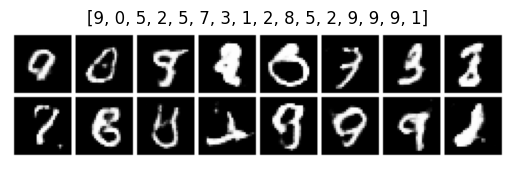

average prediction confidence over 1000 predictions: 0.5757256746292114
cumulative prediction counts: [2696, 1720, 2387, 4402, 2086, 2488, 1521, 3825, 2939, 3936]
epoch time: 17.20963168144226, total time: 479.30758595466614
Epoch [29/100] Batch [1/469] Discriminator Loss: 1.0025 Generator Loss: 2.1297
Epoch [29/100] Batch [101/469] Discriminator Loss: 0.7788 Generator Loss: 1.4882
Epoch [29/100] Batch [201/469] Discriminator Loss: 0.7982 Generator Loss: 1.6443
Epoch [29/100] Batch [301/469] Discriminator Loss: 0.8596 Generator Loss: 2.5401
Epoch [29/100] Batch [401/469] Discriminator Loss: 0.8442 Generator Loss: 1.1001


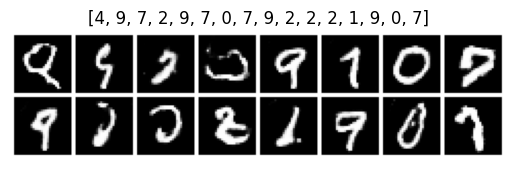

average prediction confidence over 1000 predictions: 0.5759443044662476
cumulative prediction counts: [2803, 1768, 2458, 4551, 2148, 2580, 1567, 3978, 3055, 4092]
epoch time: 16.439376831054688, total time: 495.7469627857208
Epoch [30/100] Batch [1/469] Discriminator Loss: 1.2259 Generator Loss: 2.5645
Epoch [30/100] Batch [101/469] Discriminator Loss: 0.8317 Generator Loss: 0.9325
Epoch [30/100] Batch [201/469] Discriminator Loss: 0.7607 Generator Loss: 1.6549
Epoch [30/100] Batch [301/469] Discriminator Loss: 0.8410 Generator Loss: 1.3476
Epoch [30/100] Batch [401/469] Discriminator Loss: 0.9487 Generator Loss: 0.9723


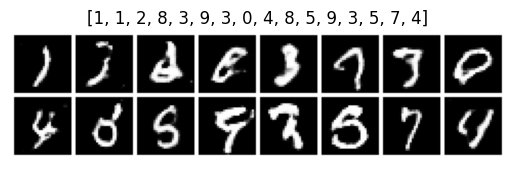

average prediction confidence over 1000 predictions: 0.5749315619468689
cumulative prediction counts: [2939, 1819, 2542, 4677, 2240, 2656, 1594, 4125, 3156, 4252]
epoch time: 16.70048499107361, total time: 512.4474477767944
Epoch [31/100] Batch [1/469] Discriminator Loss: 0.8060 Generator Loss: 1.3916
Epoch [31/100] Batch [101/469] Discriminator Loss: 0.8055 Generator Loss: 1.9656
Epoch [31/100] Batch [201/469] Discriminator Loss: 0.8687 Generator Loss: 1.7039
Epoch [31/100] Batch [301/469] Discriminator Loss: 0.8332 Generator Loss: 1.2646
Epoch [31/100] Batch [401/469] Discriminator Loss: 0.9528 Generator Loss: 0.7771


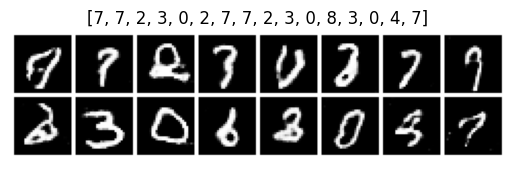

average prediction confidence over 1000 predictions: 0.5685094594955444
cumulative prediction counts: [3086, 1886, 2610, 4808, 2301, 2750, 1630, 4279, 3245, 4405]
epoch time: 17.128963232040405, total time: 529.5764110088348
Epoch [32/100] Batch [1/469] Discriminator Loss: 0.9570 Generator Loss: 1.6051
Epoch [32/100] Batch [101/469] Discriminator Loss: 0.8416 Generator Loss: 1.5642
Epoch [32/100] Batch [201/469] Discriminator Loss: 0.8082 Generator Loss: 1.5655
Epoch [32/100] Batch [301/469] Discriminator Loss: 0.8009 Generator Loss: 1.3733
Epoch [32/100] Batch [401/469] Discriminator Loss: 0.7411 Generator Loss: 1.3820


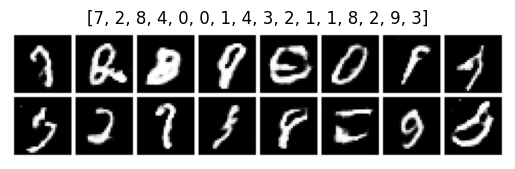

average prediction confidence over 1000 predictions: 0.5733771920204163
cumulative prediction counts: [3228, 1948, 2677, 4933, 2362, 2817, 1674, 4444, 3364, 4553]
epoch time: 17.853650093078613, total time: 547.4300611019135
Epoch [33/100] Batch [1/469] Discriminator Loss: 0.8391 Generator Loss: 2.0385
Epoch [33/100] Batch [101/469] Discriminator Loss: 0.7299 Generator Loss: 1.1132
Epoch [33/100] Batch [201/469] Discriminator Loss: 0.7753 Generator Loss: 1.4086
Epoch [33/100] Batch [301/469] Discriminator Loss: 0.8149 Generator Loss: 1.2556
Epoch [33/100] Batch [401/469] Discriminator Loss: 0.7284 Generator Loss: 1.5010


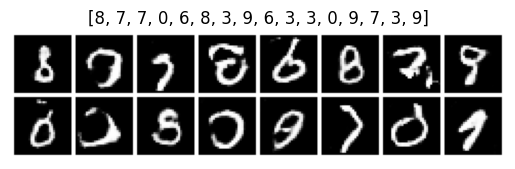

average prediction confidence over 1000 predictions: 0.5854336619377136
cumulative prediction counts: [3355, 2008, 2758, 5066, 2438, 2879, 1719, 4615, 3456, 4706]
epoch time: 16.675270318984985, total time: 564.1053314208984
Epoch [34/100] Batch [1/469] Discriminator Loss: 0.7841 Generator Loss: 1.3632
Epoch [34/100] Batch [101/469] Discriminator Loss: 0.7852 Generator Loss: 1.8406
Epoch [34/100] Batch [201/469] Discriminator Loss: 0.7909 Generator Loss: 1.5831
Epoch [34/100] Batch [301/469] Discriminator Loss: 0.7513 Generator Loss: 1.8766
Epoch [34/100] Batch [401/469] Discriminator Loss: 0.7985 Generator Loss: 1.5718


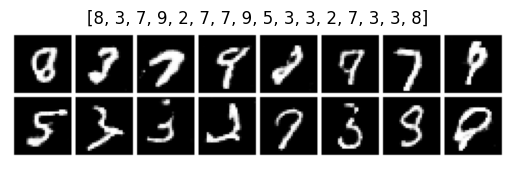

average prediction confidence over 1000 predictions: 0.5810222029685974
cumulative prediction counts: [3484, 2063, 2839, 5194, 2507, 2952, 1758, 4770, 3566, 4867]
epoch time: 17.080704927444458, total time: 581.1860363483429
Epoch [35/100] Batch [1/469] Discriminator Loss: 0.8860 Generator Loss: 1.2733
Epoch [35/100] Batch [101/469] Discriminator Loss: 0.7941 Generator Loss: 2.1720
Epoch [35/100] Batch [201/469] Discriminator Loss: 0.8285 Generator Loss: 1.1774
Epoch [35/100] Batch [301/469] Discriminator Loss: 0.8695 Generator Loss: 1.2835
Epoch [35/100] Batch [401/469] Discriminator Loss: 0.8018 Generator Loss: 1.4567


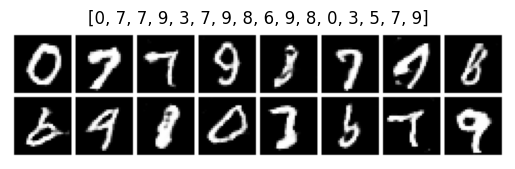

average prediction confidence over 1000 predictions: 0.5798362493515015
cumulative prediction counts: [3627, 2108, 2900, 5333, 2576, 3031, 1794, 4919, 3679, 5033]
epoch time: 16.306918621063232, total time: 597.4929549694061
Epoch [36/100] Batch [1/469] Discriminator Loss: 0.7771 Generator Loss: 1.9757
Epoch [36/100] Batch [101/469] Discriminator Loss: 0.7537 Generator Loss: 1.3947
Epoch [36/100] Batch [201/469] Discriminator Loss: 0.8195 Generator Loss: 1.7232
Epoch [36/100] Batch [301/469] Discriminator Loss: 0.7923 Generator Loss: 1.9635
Epoch [36/100] Batch [401/469] Discriminator Loss: 1.0527 Generator Loss: 0.6486


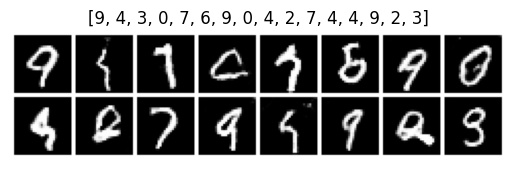

average prediction confidence over 1000 predictions: 0.572905421257019
cumulative prediction counts: [3741, 2162, 2984, 5474, 2653, 3093, 1824, 5079, 3785, 5205]
epoch time: 17.41304612159729, total time: 614.9060010910034
Epoch [37/100] Batch [1/469] Discriminator Loss: 0.9338 Generator Loss: 0.8315
Epoch [37/100] Batch [101/469] Discriminator Loss: 0.7897 Generator Loss: 1.6080
Epoch [37/100] Batch [201/469] Discriminator Loss: 0.7480 Generator Loss: 1.6867
Epoch [37/100] Batch [301/469] Discriminator Loss: 0.7761 Generator Loss: 1.8766
Epoch [37/100] Batch [401/469] Discriminator Loss: 0.8743 Generator Loss: 1.4326


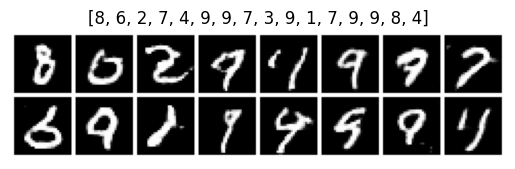

average prediction confidence over 1000 predictions: 0.5825532674789429
cumulative prediction counts: [3865, 2224, 3052, 5616, 2719, 3160, 1853, 5242, 3902, 5367]
epoch time: 16.402137279510498, total time: 631.3081383705139
Epoch [38/100] Batch [1/469] Discriminator Loss: 0.7731 Generator Loss: 1.2896
Epoch [38/100] Batch [101/469] Discriminator Loss: 0.7612 Generator Loss: 1.3176
Epoch [38/100] Batch [201/469] Discriminator Loss: 1.0605 Generator Loss: 2.3923
Epoch [38/100] Batch [301/469] Discriminator Loss: 0.9520 Generator Loss: 2.0620
Epoch [38/100] Batch [401/469] Discriminator Loss: 0.8165 Generator Loss: 2.0338


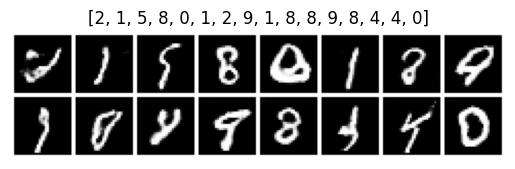

average prediction confidence over 1000 predictions: 0.5754200220108032
cumulative prediction counts: [3986, 2290, 3135, 5755, 2785, 3228, 1884, 5381, 4023, 5533]
epoch time: 16.429213762283325, total time: 647.7373521327972
Epoch [39/100] Batch [1/469] Discriminator Loss: 0.7972 Generator Loss: 1.2401
Epoch [39/100] Batch [101/469] Discriminator Loss: 0.8996 Generator Loss: 1.1989
Epoch [39/100] Batch [201/469] Discriminator Loss: 0.7977 Generator Loss: 1.9455
Epoch [39/100] Batch [301/469] Discriminator Loss: 0.7304 Generator Loss: 1.2978
Epoch [39/100] Batch [401/469] Discriminator Loss: 0.8123 Generator Loss: 1.9617


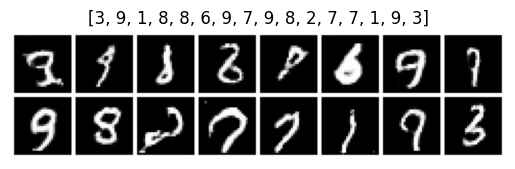

average prediction confidence over 1000 predictions: 0.5765946507453918
cumulative prediction counts: [4088, 2347, 3224, 5907, 2860, 3302, 1919, 5534, 4126, 5693]
epoch time: 16.868855237960815, total time: 664.606207370758
Epoch [40/100] Batch [1/469] Discriminator Loss: 0.8800 Generator Loss: 1.9823
Epoch [40/100] Batch [101/469] Discriminator Loss: 0.8236 Generator Loss: 1.4379
Epoch [40/100] Batch [201/469] Discriminator Loss: 0.7801 Generator Loss: 1.5047
Epoch [40/100] Batch [301/469] Discriminator Loss: 0.9147 Generator Loss: 2.2591
Epoch [40/100] Batch [401/469] Discriminator Loss: 0.8068 Generator Loss: 1.5877


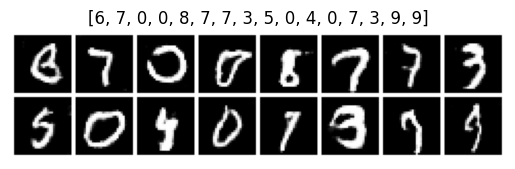

average prediction confidence over 1000 predictions: 0.5902995467185974
cumulative prediction counts: [4221, 2401, 3298, 6057, 2915, 3373, 1956, 5694, 4240, 5845]
epoch time: 16.452537298202515, total time: 681.0587446689606
Epoch [41/100] Batch [1/469] Discriminator Loss: 0.7368 Generator Loss: 1.4732
Epoch [41/100] Batch [101/469] Discriminator Loss: 0.8814 Generator Loss: 2.2726
Epoch [41/100] Batch [201/469] Discriminator Loss: 0.8675 Generator Loss: 1.1366
Epoch [41/100] Batch [301/469] Discriminator Loss: 0.8629 Generator Loss: 1.2067
Epoch [41/100] Batch [401/469] Discriminator Loss: 0.7222 Generator Loss: 1.2850


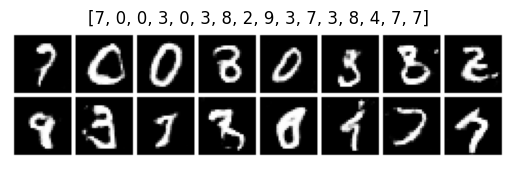

average prediction confidence over 1000 predictions: 0.5875840187072754
cumulative prediction counts: [4341, 2460, 3384, 6191, 2974, 3436, 1991, 5871, 4342, 6010]
epoch time: 16.501104831695557, total time: 697.5598495006561
Epoch [42/100] Batch [1/469] Discriminator Loss: 0.9227 Generator Loss: 1.0129
Epoch [42/100] Batch [101/469] Discriminator Loss: 0.9554 Generator Loss: 2.0144
Epoch [42/100] Batch [201/469] Discriminator Loss: 0.8295 Generator Loss: 1.3147
Epoch [42/100] Batch [301/469] Discriminator Loss: 0.8810 Generator Loss: 1.0328
Epoch [42/100] Batch [401/469] Discriminator Loss: 0.8059 Generator Loss: 1.6895


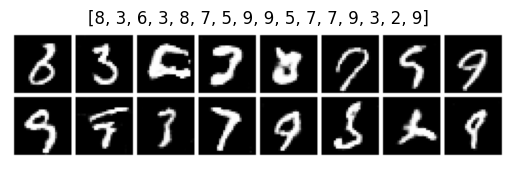

average prediction confidence over 1000 predictions: 0.5806891918182373
cumulative prediction counts: [4465, 2517, 3439, 6308, 3052, 3500, 2037, 6053, 4436, 6193]
epoch time: 17.273184537887573, total time: 714.8330340385437
Epoch [43/100] Batch [1/469] Discriminator Loss: 0.7697 Generator Loss: 2.3005
Epoch [43/100] Batch [101/469] Discriminator Loss: 0.7274 Generator Loss: 1.6372
Epoch [43/100] Batch [201/469] Discriminator Loss: 0.7141 Generator Loss: 1.5264
Epoch [43/100] Batch [301/469] Discriminator Loss: 0.8262 Generator Loss: 1.2474
Epoch [43/100] Batch [401/469] Discriminator Loss: 0.7978 Generator Loss: 2.0271


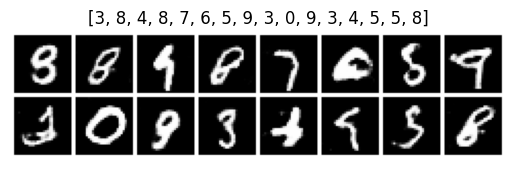

average prediction confidence over 1000 predictions: 0.5896294713020325
cumulative prediction counts: [4589, 2570, 3510, 6439, 3126, 3570, 2069, 6213, 4549, 6365]
epoch time: 16.384063005447388, total time: 731.2170970439911
Epoch [44/100] Batch [1/469] Discriminator Loss: 0.7446 Generator Loss: 1.7614
Epoch [44/100] Batch [101/469] Discriminator Loss: 0.7486 Generator Loss: 1.4599
Epoch [44/100] Batch [201/469] Discriminator Loss: 0.9204 Generator Loss: 2.4168
Epoch [44/100] Batch [301/469] Discriminator Loss: 1.0753 Generator Loss: 0.7842
Epoch [44/100] Batch [401/469] Discriminator Loss: 0.7632 Generator Loss: 1.4553


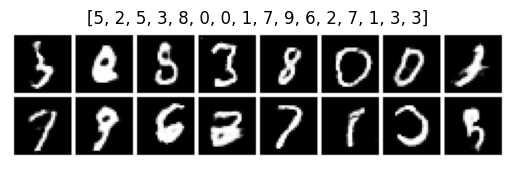

average prediction confidence over 1000 predictions: 0.6026537418365479
cumulative prediction counts: [4724, 2624, 3576, 6585, 3183, 3633, 2102, 6394, 4656, 6523]
epoch time: 16.259090900421143, total time: 747.4761879444122
Epoch [45/100] Batch [1/469] Discriminator Loss: 0.9000 Generator Loss: 1.6139
Epoch [45/100] Batch [101/469] Discriminator Loss: 0.8118 Generator Loss: 1.9306
Epoch [45/100] Batch [201/469] Discriminator Loss: 0.7957 Generator Loss: 1.8754
Epoch [45/100] Batch [301/469] Discriminator Loss: 0.7936 Generator Loss: 1.5383
Epoch [45/100] Batch [401/469] Discriminator Loss: 0.8629 Generator Loss: 1.8856


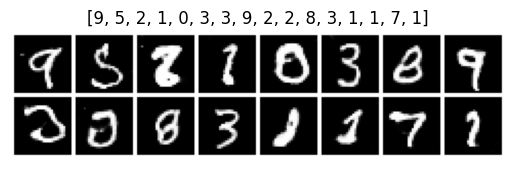

average prediction confidence over 1000 predictions: 0.5937799215316772
cumulative prediction counts: [4845, 2698, 3652, 6734, 3241, 3680, 2133, 6563, 4757, 6697]
epoch time: 16.042455196380615, total time: 763.5186431407928
Epoch [46/100] Batch [1/469] Discriminator Loss: 0.8818 Generator Loss: 1.1304
Epoch [46/100] Batch [101/469] Discriminator Loss: 0.8176 Generator Loss: 1.7153
Epoch [46/100] Batch [201/469] Discriminator Loss: 0.7531 Generator Loss: 1.4063
Epoch [46/100] Batch [301/469] Discriminator Loss: 0.7793 Generator Loss: 1.4113
Epoch [46/100] Batch [401/469] Discriminator Loss: 0.9335 Generator Loss: 1.8400


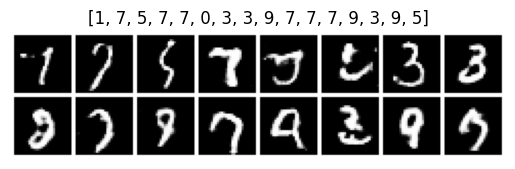

average prediction confidence over 1000 predictions: 0.5923573970794678
cumulative prediction counts: [4979, 2763, 3717, 6885, 3310, 3739, 2177, 6731, 4842, 6857]
epoch time: 15.9995858669281, total time: 779.518229007721
Epoch [47/100] Batch [1/469] Discriminator Loss: 0.7641 Generator Loss: 1.9039
Epoch [47/100] Batch [101/469] Discriminator Loss: 1.0768 Generator Loss: 0.6100
Epoch [47/100] Batch [201/469] Discriminator Loss: 0.8389 Generator Loss: 1.4045
Epoch [47/100] Batch [301/469] Discriminator Loss: 0.7778 Generator Loss: 1.2932
Epoch [47/100] Batch [401/469] Discriminator Loss: 0.9895 Generator Loss: 1.0069


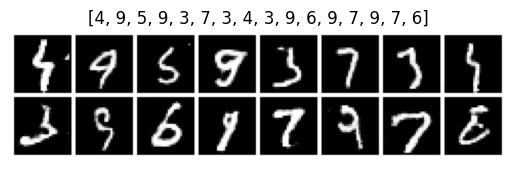

average prediction confidence over 1000 predictions: 0.6030919551849365
cumulative prediction counts: [5105, 2821, 3786, 7017, 3380, 3799, 2216, 6892, 4940, 7044]
epoch time: 16.63922381401062, total time: 796.1574528217316
Epoch [48/100] Batch [1/469] Discriminator Loss: 0.7100 Generator Loss: 1.5343
Epoch [48/100] Batch [101/469] Discriminator Loss: 0.7488 Generator Loss: 1.5083
Epoch [48/100] Batch [201/469] Discriminator Loss: 0.7129 Generator Loss: 1.6650
Epoch [48/100] Batch [301/469] Discriminator Loss: 0.7773 Generator Loss: 1.3644
Epoch [48/100] Batch [401/469] Discriminator Loss: 0.7397 Generator Loss: 1.5555


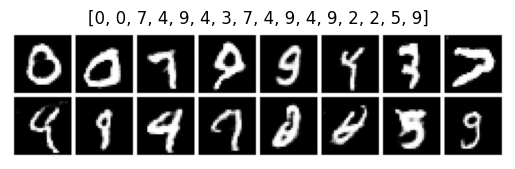

average prediction confidence over 1000 predictions: 0.6050236821174622
cumulative prediction counts: [5216, 2874, 3865, 7147, 3455, 3858, 2243, 7067, 5057, 7218]
epoch time: 15.914484024047852, total time: 812.0719368457794
Epoch [49/100] Batch [1/469] Discriminator Loss: 0.7124 Generator Loss: 1.3881
Epoch [49/100] Batch [101/469] Discriminator Loss: 1.0346 Generator Loss: 1.0315
Epoch [49/100] Batch [201/469] Discriminator Loss: 0.7691 Generator Loss: 1.5928
Epoch [49/100] Batch [301/469] Discriminator Loss: 0.6990 Generator Loss: 2.0634
Epoch [49/100] Batch [401/469] Discriminator Loss: 0.7998 Generator Loss: 1.8566


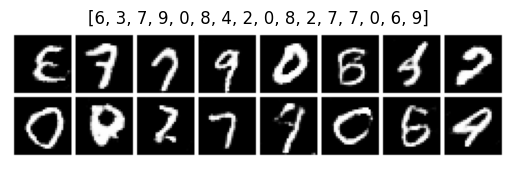

average prediction confidence over 1000 predictions: 0.5982749462127686
cumulative prediction counts: [5347, 2929, 3943, 7264, 3510, 3919, 2283, 7237, 5166, 7402]
epoch time: 16.634113550186157, total time: 828.7060503959656
Epoch [50/100] Batch [1/469] Discriminator Loss: 0.7044 Generator Loss: 1.6126
Epoch [50/100] Batch [101/469] Discriminator Loss: 0.7586 Generator Loss: 1.7642
Epoch [50/100] Batch [201/469] Discriminator Loss: 0.7675 Generator Loss: 1.6423
Epoch [50/100] Batch [301/469] Discriminator Loss: 0.7992 Generator Loss: 1.8306
Epoch [50/100] Batch [401/469] Discriminator Loss: 0.7848 Generator Loss: 1.9085


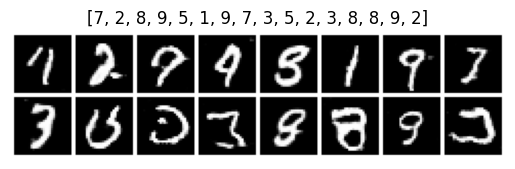

average prediction confidence over 1000 predictions: 0.5952500104904175
cumulative prediction counts: [5475, 2990, 4002, 7406, 3569, 3980, 2302, 7418, 5282, 7576]
epoch time: 16.360273599624634, total time: 845.0663239955902
Epoch [51/100] Batch [1/469] Discriminator Loss: 0.8121 Generator Loss: 2.4600
Epoch [51/100] Batch [101/469] Discriminator Loss: 0.6306 Generator Loss: 1.7495
Epoch [51/100] Batch [201/469] Discriminator Loss: 0.8375 Generator Loss: 2.0778
Epoch [51/100] Batch [301/469] Discriminator Loss: 0.8353 Generator Loss: 1.3998
Epoch [51/100] Batch [401/469] Discriminator Loss: 0.7538 Generator Loss: 1.6980


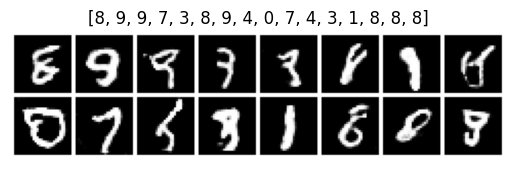

average prediction confidence over 1000 predictions: 0.6010391116142273
cumulative prediction counts: [5601, 3053, 4061, 7537, 3629, 4043, 2345, 7588, 5390, 7753]
epoch time: 16.700138807296753, total time: 861.766462802887
Epoch [52/100] Batch [1/469] Discriminator Loss: 0.8385 Generator Loss: 1.8047
Epoch [52/100] Batch [101/469] Discriminator Loss: 0.7654 Generator Loss: 1.9354
Epoch [52/100] Batch [201/469] Discriminator Loss: 0.7025 Generator Loss: 1.6298
Epoch [52/100] Batch [301/469] Discriminator Loss: 0.7985 Generator Loss: 2.6221
Epoch [52/100] Batch [401/469] Discriminator Loss: 0.6798 Generator Loss: 1.9625


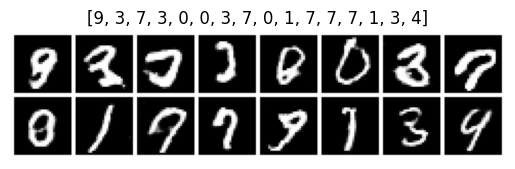

average prediction confidence over 1000 predictions: 0.6070002913475037
cumulative prediction counts: [5726, 3101, 4135, 7668, 3708, 4096, 2380, 7765, 5499, 7922]
epoch time: 16.57347536087036, total time: 878.3399381637573
Epoch [53/100] Batch [1/469] Discriminator Loss: 0.7343 Generator Loss: 1.2999
Epoch [53/100] Batch [101/469] Discriminator Loss: 0.7998 Generator Loss: 2.4216
Epoch [53/100] Batch [201/469] Discriminator Loss: 0.8657 Generator Loss: 2.3067
Epoch [53/100] Batch [301/469] Discriminator Loss: 0.8651 Generator Loss: 1.1274
Epoch [53/100] Batch [401/469] Discriminator Loss: 0.7484 Generator Loss: 1.9273


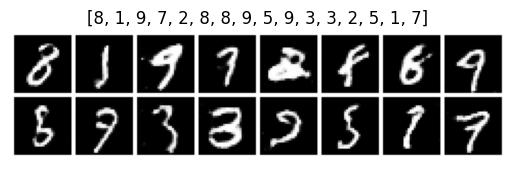

average prediction confidence over 1000 predictions: 0.6021943688392639
cumulative prediction counts: [5863, 3164, 4207, 7818, 3771, 4156, 2405, 7925, 5609, 8082]
epoch time: 16.342066049575806, total time: 894.6820042133331
Epoch [54/100] Batch [1/469] Discriminator Loss: 0.6922 Generator Loss: 1.2995
Epoch [54/100] Batch [101/469] Discriminator Loss: 0.7435 Generator Loss: 1.6115
Epoch [54/100] Batch [201/469] Discriminator Loss: 0.8095 Generator Loss: 1.7556
Epoch [54/100] Batch [301/469] Discriminator Loss: 0.7911 Generator Loss: 2.8672
Epoch [54/100] Batch [401/469] Discriminator Loss: 0.6643 Generator Loss: 1.7813


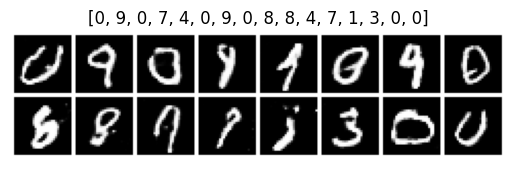

average prediction confidence over 1000 predictions: 0.6059486269950867
cumulative prediction counts: [5995, 3233, 4276, 7964, 3844, 4205, 2439, 8091, 5721, 8232]
epoch time: 16.8141188621521, total time: 911.4961230754852
Epoch [55/100] Batch [1/469] Discriminator Loss: 0.7006 Generator Loss: 1.7169
Epoch [55/100] Batch [101/469] Discriminator Loss: 0.8779 Generator Loss: 2.0085
Epoch [55/100] Batch [201/469] Discriminator Loss: 0.7348 Generator Loss: 1.8899
Epoch [55/100] Batch [301/469] Discriminator Loss: 0.7852 Generator Loss: 1.6897
Epoch [55/100] Batch [401/469] Discriminator Loss: 0.6919 Generator Loss: 1.5394


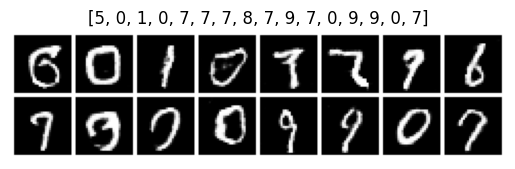

average prediction confidence over 1000 predictions: 0.5994987487792969
cumulative prediction counts: [6133, 3304, 4325, 8103, 3897, 4268, 2475, 8272, 5820, 8403]
epoch time: 16.3834068775177, total time: 927.8795299530029
Epoch [56/100] Batch [1/469] Discriminator Loss: 0.8125 Generator Loss: 1.5182
Epoch [56/100] Batch [101/469] Discriminator Loss: 0.8093 Generator Loss: 1.1822
Epoch [56/100] Batch [201/469] Discriminator Loss: 0.7663 Generator Loss: 1.6865
Epoch [56/100] Batch [301/469] Discriminator Loss: 0.8610 Generator Loss: 2.3773
Epoch [56/100] Batch [401/469] Discriminator Loss: 0.6788 Generator Loss: 1.5952


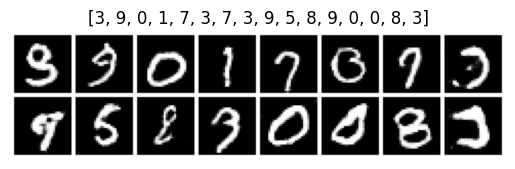

average prediction confidence over 1000 predictions: 0.6050335168838501
cumulative prediction counts: [6270, 3368, 4403, 8226, 3959, 4320, 2502, 8452, 5925, 8575]
epoch time: 17.275675773620605, total time: 945.1552057266235
Epoch [57/100] Batch [1/469] Discriminator Loss: 0.8583 Generator Loss: 1.4578
Epoch [57/100] Batch [101/469] Discriminator Loss: 0.7910 Generator Loss: 2.0963
Epoch [57/100] Batch [201/469] Discriminator Loss: 0.7648 Generator Loss: 2.0262
Epoch [57/100] Batch [301/469] Discriminator Loss: 0.8860 Generator Loss: 1.9503
Epoch [57/100] Batch [401/469] Discriminator Loss: 0.9568 Generator Loss: 0.7951


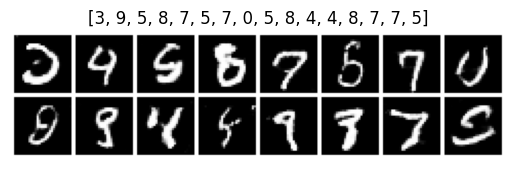

average prediction confidence over 1000 predictions: 0.5969970226287842
cumulative prediction counts: [6403, 3421, 4475, 8344, 4028, 4369, 2528, 8666, 6036, 8730]
epoch time: 16.528621435165405, total time: 961.6838271617889
Epoch [58/100] Batch [1/469] Discriminator Loss: 0.7266 Generator Loss: 1.6883
Epoch [58/100] Batch [101/469] Discriminator Loss: 0.7727 Generator Loss: 1.5132
Epoch [58/100] Batch [201/469] Discriminator Loss: 0.8710 Generator Loss: 2.3843
Epoch [58/100] Batch [301/469] Discriminator Loss: 0.7648 Generator Loss: 2.0282
Epoch [58/100] Batch [401/469] Discriminator Loss: 1.0242 Generator Loss: 0.6944


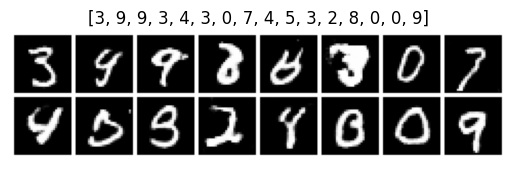

average prediction confidence over 1000 predictions: 0.6010167598724365
cumulative prediction counts: [6532, 3482, 4534, 8479, 4101, 4424, 2565, 8847, 6125, 8911]
epoch time: 16.27734637260437, total time: 977.9611735343933
Epoch [59/100] Batch [1/469] Discriminator Loss: 0.7955 Generator Loss: 1.7218
Epoch [59/100] Batch [101/469] Discriminator Loss: 0.9916 Generator Loss: 1.0344
Epoch [59/100] Batch [201/469] Discriminator Loss: 1.0467 Generator Loss: 1.3102
Epoch [59/100] Batch [301/469] Discriminator Loss: 0.9505 Generator Loss: 1.3462
Epoch [59/100] Batch [401/469] Discriminator Loss: 0.8829 Generator Loss: 0.8970


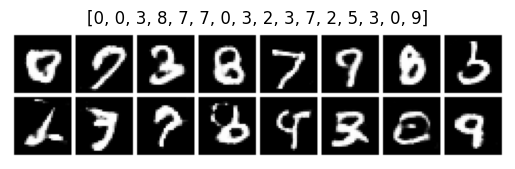

average prediction confidence over 1000 predictions: 0.6027662754058838
cumulative prediction counts: [6661, 3542, 4599, 8610, 4147, 4494, 2597, 9037, 6232, 9081]
epoch time: 16.383503675460815, total time: 994.3446772098541
Epoch [60/100] Batch [1/469] Discriminator Loss: 0.6760 Generator Loss: 2.0162
Epoch [60/100] Batch [101/469] Discriminator Loss: 0.7221 Generator Loss: 1.7849
Epoch [60/100] Batch [201/469] Discriminator Loss: 0.8877 Generator Loss: 1.4856
Epoch [60/100] Batch [301/469] Discriminator Loss: 0.8742 Generator Loss: 2.3956
Epoch [60/100] Batch [401/469] Discriminator Loss: 0.8033 Generator Loss: 1.6063


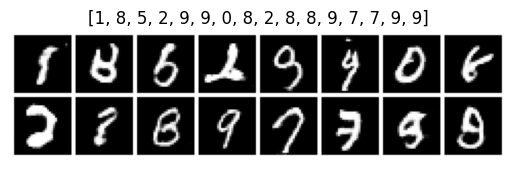

average prediction confidence over 1000 predictions: 0.5994096994400024
cumulative prediction counts: [6783, 3604, 4670, 8745, 4205, 4548, 2621, 9220, 6362, 9242]
epoch time: 16.26876926422119, total time: 1010.6134464740753
Epoch [61/100] Batch [1/469] Discriminator Loss: 0.8375 Generator Loss: 1.2589
Epoch [61/100] Batch [101/469] Discriminator Loss: 1.0256 Generator Loss: 2.6244
Epoch [61/100] Batch [201/469] Discriminator Loss: 0.8833 Generator Loss: 1.3084
Epoch [61/100] Batch [301/469] Discriminator Loss: 0.8716 Generator Loss: 3.2923
Epoch [61/100] Batch [401/469] Discriminator Loss: 0.8464 Generator Loss: 2.0407


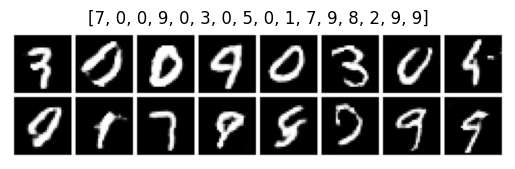

average prediction confidence over 1000 predictions: 0.5967801809310913
cumulative prediction counts: [6912, 3658, 4735, 8862, 4283, 4615, 2650, 9398, 6475, 9412]
epoch time: 16.701878786087036, total time: 1027.3153252601624
Epoch [62/100] Batch [1/469] Discriminator Loss: 1.0019 Generator Loss: 2.5643
Epoch [62/100] Batch [101/469] Discriminator Loss: 0.8162 Generator Loss: 1.1087
Epoch [62/100] Batch [201/469] Discriminator Loss: 0.6947 Generator Loss: 1.6463
Epoch [62/100] Batch [301/469] Discriminator Loss: 0.7992 Generator Loss: 1.6565
Epoch [62/100] Batch [401/469] Discriminator Loss: 0.8124 Generator Loss: 1.5216


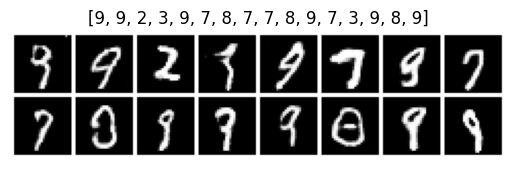

average prediction confidence over 1000 predictions: 0.5991593599319458
cumulative prediction counts: [7038, 3716, 4801, 8995, 4345, 4670, 2674, 9584, 6580, 9597]
epoch time: 16.25206160545349, total time: 1043.5673868656158
Epoch [63/100] Batch [1/469] Discriminator Loss: 0.6658 Generator Loss: 1.7718
Epoch [63/100] Batch [101/469] Discriminator Loss: 0.8459 Generator Loss: 1.4991
Epoch [63/100] Batch [201/469] Discriminator Loss: 0.7704 Generator Loss: 2.2198
Epoch [63/100] Batch [301/469] Discriminator Loss: 0.6958 Generator Loss: 1.8408
Epoch [63/100] Batch [401/469] Discriminator Loss: 0.7238 Generator Loss: 1.5440


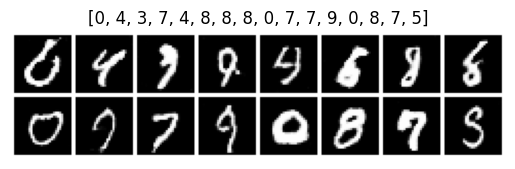

average prediction confidence over 1000 predictions: 0.5959317684173584
cumulative prediction counts: [7172, 3768, 4870, 9101, 4425, 4719, 2689, 9790, 6688, 9778]
epoch time: 16.31582474708557, total time: 1059.8832116127014
Epoch [64/100] Batch [1/469] Discriminator Loss: 0.7446 Generator Loss: 1.7482
Epoch [64/100] Batch [101/469] Discriminator Loss: 0.7744 Generator Loss: 1.3489
Epoch [64/100] Batch [201/469] Discriminator Loss: 0.8810 Generator Loss: 1.3990
Epoch [64/100] Batch [301/469] Discriminator Loss: 1.2393 Generator Loss: 1.0690
Epoch [64/100] Batch [401/469] Discriminator Loss: 0.8398 Generator Loss: 1.4084


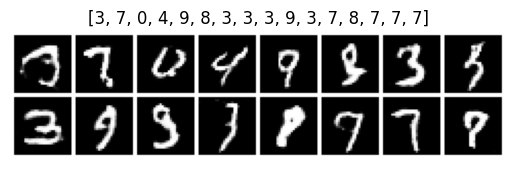

average prediction confidence over 1000 predictions: 0.6014780402183533
cumulative prediction counts: [7303, 3827, 4939, 9258, 4497, 4768, 2712, 9960, 6782, 9954]
epoch time: 16.77902626991272, total time: 1076.6622378826141
Epoch [65/100] Batch [1/469] Discriminator Loss: 0.6792 Generator Loss: 1.8877
Epoch [65/100] Batch [101/469] Discriminator Loss: 0.8083 Generator Loss: 1.8260
Epoch [65/100] Batch [201/469] Discriminator Loss: 0.7465 Generator Loss: 1.2092
Epoch [65/100] Batch [301/469] Discriminator Loss: 0.7212 Generator Loss: 1.8135
Epoch [65/100] Batch [401/469] Discriminator Loss: 0.8005 Generator Loss: 1.3430


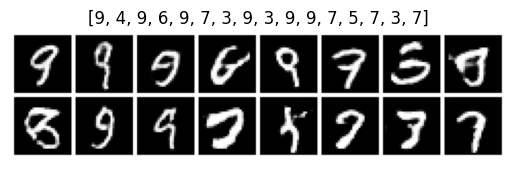

average prediction confidence over 1000 predictions: 0.6058297157287598
cumulative prediction counts: [7444, 3876, 4993, 9404, 4556, 4819, 2739, 10147, 6882, 10140]
epoch time: 16.786993265151978, total time: 1093.449231147766
Epoch [66/100] Batch [1/469] Discriminator Loss: 0.7303 Generator Loss: 1.5751
Epoch [66/100] Batch [101/469] Discriminator Loss: 0.8560 Generator Loss: 1.1677
Epoch [66/100] Batch [201/469] Discriminator Loss: 0.8437 Generator Loss: 1.6310
Epoch [66/100] Batch [301/469] Discriminator Loss: 0.7831 Generator Loss: 2.0980
Epoch [66/100] Batch [401/469] Discriminator Loss: 0.7542 Generator Loss: 1.9327


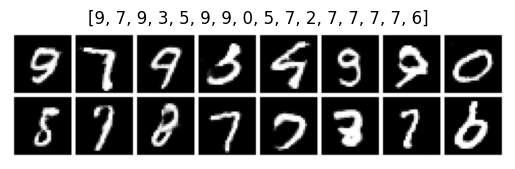

average prediction confidence over 1000 predictions: 0.615257203578949
cumulative prediction counts: [7589, 3938, 5050, 9518, 4622, 4865, 2756, 10348, 6993, 10321]
epoch time: 16.73777723312378, total time: 1110.18700838089
Epoch [67/100] Batch [1/469] Discriminator Loss: 0.7722 Generator Loss: 2.1282
Epoch [67/100] Batch [101/469] Discriminator Loss: 0.6953 Generator Loss: 1.5508
Epoch [67/100] Batch [201/469] Discriminator Loss: 0.6777 Generator Loss: 1.4194
Epoch [67/100] Batch [301/469] Discriminator Loss: 0.7295 Generator Loss: 1.7076
Epoch [67/100] Batch [401/469] Discriminator Loss: 0.8344 Generator Loss: 1.9950


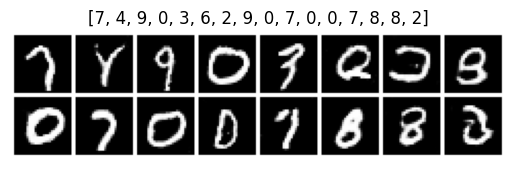

average prediction confidence over 1000 predictions: 0.6168819665908813
cumulative prediction counts: [7735, 3990, 5110, 9650, 4673, 4903, 2778, 10559, 7102, 10500]
epoch time: 16.100894451141357, total time: 1126.2879028320312
Epoch [68/100] Batch [1/469] Discriminator Loss: 0.7837 Generator Loss: 1.7179
Epoch [68/100] Batch [101/469] Discriminator Loss: 0.7384 Generator Loss: 2.0276
Epoch [68/100] Batch [201/469] Discriminator Loss: 0.7517 Generator Loss: 1.4150
Epoch [68/100] Batch [301/469] Discriminator Loss: 0.7698 Generator Loss: 1.1178
Epoch [68/100] Batch [401/469] Discriminator Loss: 0.7264 Generator Loss: 2.1215


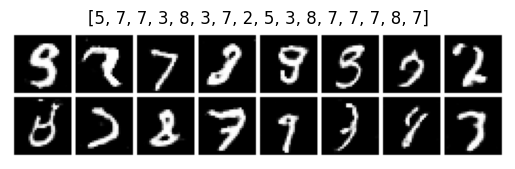

average prediction confidence over 1000 predictions: 0.6067345142364502
cumulative prediction counts: [7867, 4040, 5180, 9771, 4740, 4952, 2803, 10771, 7213, 10663]
epoch time: 16.759185791015625, total time: 1143.0470886230469
Epoch [69/100] Batch [1/469] Discriminator Loss: 0.6871 Generator Loss: 1.9401
Epoch [69/100] Batch [101/469] Discriminator Loss: 0.6690 Generator Loss: 1.8505
Epoch [69/100] Batch [201/469] Discriminator Loss: 0.8471 Generator Loss: 2.0727
Epoch [69/100] Batch [301/469] Discriminator Loss: 0.6810 Generator Loss: 1.6985
Epoch [69/100] Batch [401/469] Discriminator Loss: 0.9334 Generator Loss: 1.2181


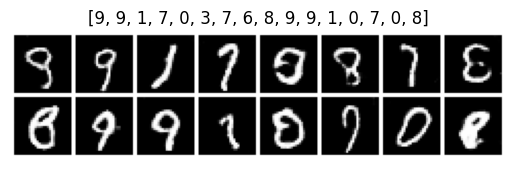

average prediction confidence over 1000 predictions: 0.6030098795890808
cumulative prediction counts: [8021, 4090, 5245, 9897, 4795, 5011, 2821, 10965, 7313, 10842]
epoch time: 16.080047845840454, total time: 1159.1271364688873
Epoch [70/100] Batch [1/469] Discriminator Loss: 0.6618 Generator Loss: 1.7026
Epoch [70/100] Batch [101/469] Discriminator Loss: 0.7709 Generator Loss: 2.3519
Epoch [70/100] Batch [201/469] Discriminator Loss: 0.7420 Generator Loss: 1.9078
Epoch [70/100] Batch [301/469] Discriminator Loss: 0.7838 Generator Loss: 1.8516
Epoch [70/100] Batch [401/469] Discriminator Loss: 1.0843 Generator Loss: 0.9434


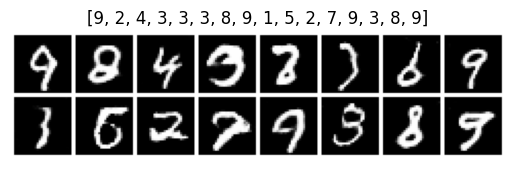

average prediction confidence over 1000 predictions: 0.6151584386825562
cumulative prediction counts: [8173, 4147, 5293, 10027, 4849, 5067, 2844, 11146, 7421, 11033]
epoch time: 16.206722021102905, total time: 1175.3338584899902
Epoch [71/100] Batch [1/469] Discriminator Loss: 0.8448 Generator Loss: 2.0428
Epoch [71/100] Batch [101/469] Discriminator Loss: 0.6826 Generator Loss: 1.3625
Epoch [71/100] Batch [201/469] Discriminator Loss: 0.9442 Generator Loss: 1.1532
Epoch [71/100] Batch [301/469] Discriminator Loss: 0.7334 Generator Loss: 1.2187
Epoch [71/100] Batch [401/469] Discriminator Loss: 0.7194 Generator Loss: 1.5200


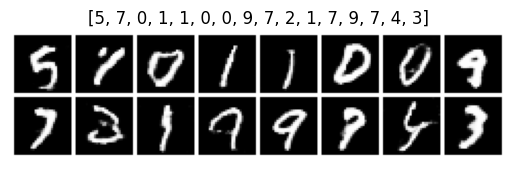

average prediction confidence over 1000 predictions: 0.6101682186126709
cumulative prediction counts: [8308, 4202, 5352, 10164, 4900, 5115, 2877, 11353, 7511, 11218]
epoch time: 17.213021516799927, total time: 1192.5468800067902
Epoch [72/100] Batch [1/469] Discriminator Loss: 0.8031 Generator Loss: 2.1480
Epoch [72/100] Batch [101/469] Discriminator Loss: 0.6988 Generator Loss: 1.5932
Epoch [72/100] Batch [201/469] Discriminator Loss: 0.7141 Generator Loss: 2.0787
Epoch [72/100] Batch [301/469] Discriminator Loss: 0.7964 Generator Loss: 1.4400
Epoch [72/100] Batch [401/469] Discriminator Loss: 0.6632 Generator Loss: 2.0762


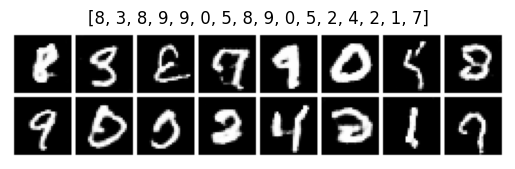

average prediction confidence over 1000 predictions: 0.6222772002220154
cumulative prediction counts: [8434, 4247, 5417, 10312, 4971, 5162, 2906, 11558, 7601, 11392]
epoch time: 16.349596977233887, total time: 1208.896476984024
Epoch [73/100] Batch [1/469] Discriminator Loss: 0.7875 Generator Loss: 1.3333
Epoch [73/100] Batch [101/469] Discriminator Loss: 0.8009 Generator Loss: 1.4352
Epoch [73/100] Batch [201/469] Discriminator Loss: 0.6971 Generator Loss: 1.6322
Epoch [73/100] Batch [301/469] Discriminator Loss: 0.8589 Generator Loss: 1.6418
Epoch [73/100] Batch [401/469] Discriminator Loss: 0.7150 Generator Loss: 2.1661


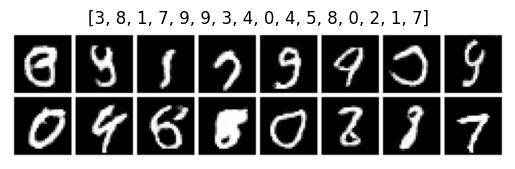

average prediction confidence over 1000 predictions: 0.6126325726509094
cumulative prediction counts: [8557, 4306, 5484, 10445, 5037, 5209, 2933, 11757, 7698, 11574]
epoch time: 17.187183618545532, total time: 1226.0836606025696
Epoch [74/100] Batch [1/469] Discriminator Loss: 0.7373 Generator Loss: 2.2052
Epoch [74/100] Batch [101/469] Discriminator Loss: 0.7649 Generator Loss: 2.0048
Epoch [74/100] Batch [201/469] Discriminator Loss: 0.7544 Generator Loss: 1.3735
Epoch [74/100] Batch [301/469] Discriminator Loss: 0.7791 Generator Loss: 2.0868
Epoch [74/100] Batch [401/469] Discriminator Loss: 0.6892 Generator Loss: 2.2210


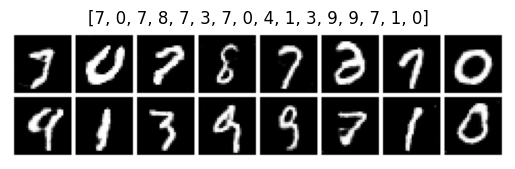

average prediction confidence over 1000 predictions: 0.6192700266838074
cumulative prediction counts: [8692, 4360, 5533, 10577, 5098, 5257, 2955, 11985, 7799, 11744]
epoch time: 16.227055311203003, total time: 1242.3107159137726
Epoch [75/100] Batch [1/469] Discriminator Loss: 0.7406 Generator Loss: 1.7684
Epoch [75/100] Batch [101/469] Discriminator Loss: 0.8803 Generator Loss: 2.4304
Epoch [75/100] Batch [201/469] Discriminator Loss: 0.7041 Generator Loss: 2.2609
Epoch [75/100] Batch [301/469] Discriminator Loss: 0.7121 Generator Loss: 1.5526
Epoch [75/100] Batch [401/469] Discriminator Loss: 0.8201 Generator Loss: 2.2605


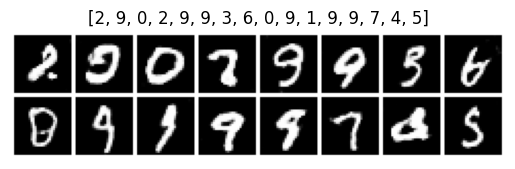

average prediction confidence over 1000 predictions: 0.6102687120437622
cumulative prediction counts: [8827, 4426, 5585, 10700, 5154, 5315, 2980, 12206, 7889, 11918]
epoch time: 17.120115041732788, total time: 1259.4308309555054
Epoch [76/100] Batch [1/469] Discriminator Loss: 0.7213 Generator Loss: 2.1416
Epoch [76/100] Batch [101/469] Discriminator Loss: 0.7503 Generator Loss: 1.7052
Epoch [76/100] Batch [201/469] Discriminator Loss: 0.8029 Generator Loss: 1.1122
Epoch [76/100] Batch [301/469] Discriminator Loss: 0.5957 Generator Loss: 1.6915
Epoch [76/100] Batch [401/469] Discriminator Loss: 0.8110 Generator Loss: 1.4690


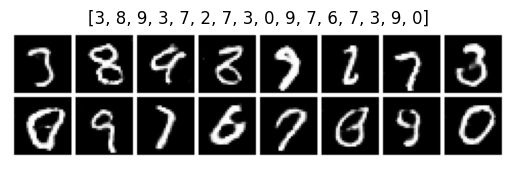

average prediction confidence over 1000 predictions: 0.613570511341095
cumulative prediction counts: [8970, 4482, 5650, 10820, 5223, 5367, 3002, 12384, 8001, 12101]
epoch time: 16.32644033432007, total time: 1275.7572712898254
Epoch [77/100] Batch [1/469] Discriminator Loss: 0.7024 Generator Loss: 2.1005
Epoch [77/100] Batch [101/469] Discriminator Loss: 0.7910 Generator Loss: 2.2902
Epoch [77/100] Batch [201/469] Discriminator Loss: 0.7471 Generator Loss: 1.9344
Epoch [77/100] Batch [301/469] Discriminator Loss: 0.8092 Generator Loss: 1.6141
Epoch [77/100] Batch [401/469] Discriminator Loss: 0.8572 Generator Loss: 2.0490


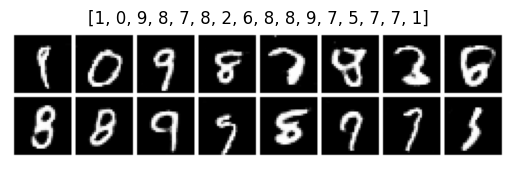

average prediction confidence over 1000 predictions: 0.6080820560455322
cumulative prediction counts: [9105, 4537, 5718, 10943, 5280, 5419, 3031, 12579, 8096, 12292]
epoch time: 16.40619993209839, total time: 1292.1634712219238
Epoch [78/100] Batch [1/469] Discriminator Loss: 0.7857 Generator Loss: 1.0104
Epoch [78/100] Batch [101/469] Discriminator Loss: 0.6748 Generator Loss: 1.6512
Epoch [78/100] Batch [201/469] Discriminator Loss: 0.7991 Generator Loss: 1.8469
Epoch [78/100] Batch [301/469] Discriminator Loss: 0.6421 Generator Loss: 2.0053
Epoch [78/100] Batch [401/469] Discriminator Loss: 0.8531 Generator Loss: 1.4905


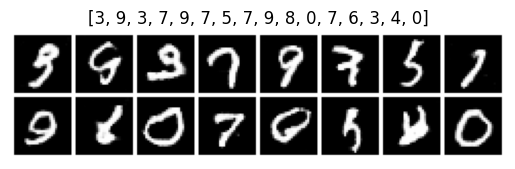

average prediction confidence over 1000 predictions: 0.612369179725647
cumulative prediction counts: [9254, 4595, 5779, 11050, 5347, 5476, 3057, 12791, 8206, 12445]
epoch time: 16.53551197052002, total time: 1308.6989831924438
Epoch [79/100] Batch [1/469] Discriminator Loss: 0.8021 Generator Loss: 1.6231
Epoch [79/100] Batch [101/469] Discriminator Loss: 0.7446 Generator Loss: 1.6298
Epoch [79/100] Batch [201/469] Discriminator Loss: 0.6841 Generator Loss: 1.8963
Epoch [79/100] Batch [301/469] Discriminator Loss: 0.7220 Generator Loss: 1.3846
Epoch [79/100] Batch [401/469] Discriminator Loss: 0.8404 Generator Loss: 1.9391


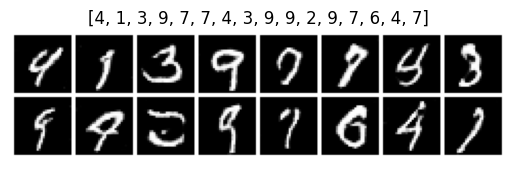

average prediction confidence over 1000 predictions: 0.6191485524177551
cumulative prediction counts: [9437, 4637, 5844, 11144, 5412, 5527, 3085, 12975, 8300, 12639]
epoch time: 16.514572381973267, total time: 1325.2135555744171
Epoch [80/100] Batch [1/469] Discriminator Loss: 0.8880 Generator Loss: 2.3053
Epoch [80/100] Batch [101/469] Discriminator Loss: 0.8514 Generator Loss: 1.5980
Epoch [80/100] Batch [201/469] Discriminator Loss: 0.7914 Generator Loss: 2.1532
Epoch [80/100] Batch [301/469] Discriminator Loss: 0.7755 Generator Loss: 2.1546
Epoch [80/100] Batch [401/469] Discriminator Loss: 0.6677 Generator Loss: 1.7056


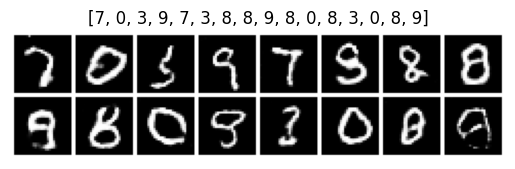

average prediction confidence over 1000 predictions: 0.6104236245155334
cumulative prediction counts: [9572, 4689, 5913, 11251, 5480, 5582, 3102, 13164, 8405, 12842]
epoch time: 16.734742164611816, total time: 1341.948297739029
Epoch [81/100] Batch [1/469] Discriminator Loss: 0.7141 Generator Loss: 1.8276
Epoch [81/100] Batch [101/469] Discriminator Loss: 0.6734 Generator Loss: 2.3076
Epoch [81/100] Batch [201/469] Discriminator Loss: 0.8128 Generator Loss: 1.5395
Epoch [81/100] Batch [301/469] Discriminator Loss: 0.6321 Generator Loss: 1.6730
Epoch [81/100] Batch [401/469] Discriminator Loss: 0.7706 Generator Loss: 1.4251


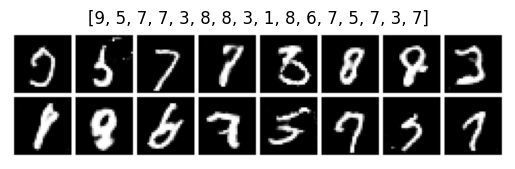

average prediction confidence over 1000 predictions: 0.6155275106430054
cumulative prediction counts: [9709, 4749, 5974, 11368, 5546, 5630, 3122, 13357, 8503, 13042]
epoch time: 16.538496255874634, total time: 1358.4867939949036
Epoch [82/100] Batch [1/469] Discriminator Loss: 0.7712 Generator Loss: 2.3111
Epoch [82/100] Batch [101/469] Discriminator Loss: 0.7357 Generator Loss: 1.8643
Epoch [82/100] Batch [201/469] Discriminator Loss: 0.7420 Generator Loss: 1.7155
Epoch [82/100] Batch [301/469] Discriminator Loss: 0.6821 Generator Loss: 1.5681
Epoch [82/100] Batch [401/469] Discriminator Loss: 0.6894 Generator Loss: 1.7519


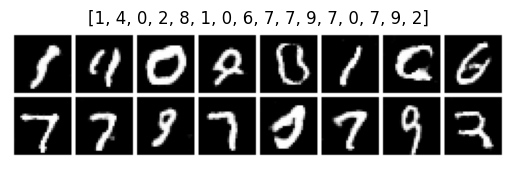

average prediction confidence over 1000 predictions: 0.6134365797042847
cumulative prediction counts: [9842, 4808, 6036, 11495, 5613, 5671, 3144, 13568, 8590, 13233]
epoch time: 16.73499870300293, total time: 1375.2217926979065
Epoch [83/100] Batch [1/469] Discriminator Loss: 0.8138 Generator Loss: 1.1787
Epoch [83/100] Batch [101/469] Discriminator Loss: 0.6329 Generator Loss: 1.5610
Epoch [83/100] Batch [201/469] Discriminator Loss: 0.8005 Generator Loss: 2.8140
Epoch [83/100] Batch [301/469] Discriminator Loss: 0.6458 Generator Loss: 1.9054
Epoch [83/100] Batch [401/469] Discriminator Loss: 0.7569 Generator Loss: 1.8667


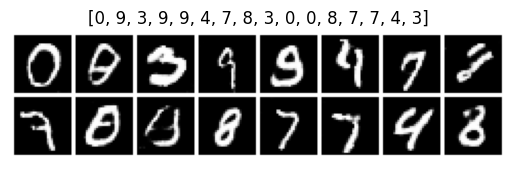

average prediction confidence over 1000 predictions: 0.6069238185882568
cumulative prediction counts: [9988, 4867, 6106, 11614, 5674, 5705, 3170, 13743, 8701, 13432]
epoch time: 16.381341218948364, total time: 1391.6031339168549
Epoch [84/100] Batch [1/469] Discriminator Loss: 0.7341 Generator Loss: 1.5868
Epoch [84/100] Batch [101/469] Discriminator Loss: 0.7651 Generator Loss: 1.4788
Epoch [84/100] Batch [201/469] Discriminator Loss: 0.9125 Generator Loss: 1.5622
Epoch [84/100] Batch [301/469] Discriminator Loss: 0.7686 Generator Loss: 1.7228
Epoch [84/100] Batch [401/469] Discriminator Loss: 0.7502 Generator Loss: 2.2593


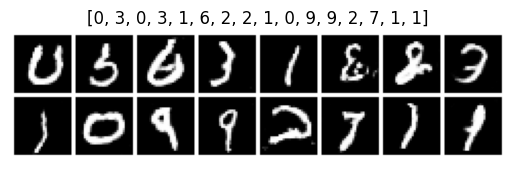

average prediction confidence over 1000 predictions: 0.6166693568229675
cumulative prediction counts: [10129, 4927, 6165, 11736, 5738, 5745, 3190, 13949, 8799, 13622]
epoch time: 16.250687837600708, total time: 1407.8538217544556
Epoch [85/100] Batch [1/469] Discriminator Loss: 0.7163 Generator Loss: 2.2186
Epoch [85/100] Batch [101/469] Discriminator Loss: 0.7753 Generator Loss: 1.6139
Epoch [85/100] Batch [201/469] Discriminator Loss: 0.7512 Generator Loss: 1.8051
Epoch [85/100] Batch [301/469] Discriminator Loss: 0.8332 Generator Loss: 2.0146
Epoch [85/100] Batch [401/469] Discriminator Loss: 0.8331 Generator Loss: 2.3025


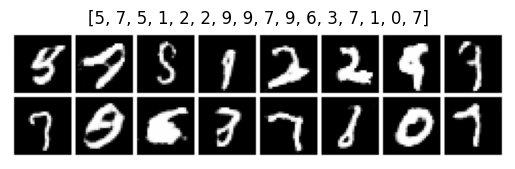

average prediction confidence over 1000 predictions: 0.6107689738273621
cumulative prediction counts: [10258, 4978, 6237, 11852, 5802, 5795, 3221, 14143, 8882, 13832]
epoch time: 16.862087965011597, total time: 1424.7159097194672
Epoch [86/100] Batch [1/469] Discriminator Loss: 0.7540 Generator Loss: 1.4927
Epoch [86/100] Batch [101/469] Discriminator Loss: 0.7907 Generator Loss: 1.4567
Epoch [86/100] Batch [201/469] Discriminator Loss: 0.8418 Generator Loss: 3.1433
Epoch [86/100] Batch [301/469] Discriminator Loss: 0.6509 Generator Loss: 1.7158
Epoch [86/100] Batch [401/469] Discriminator Loss: 0.7051 Generator Loss: 1.9471


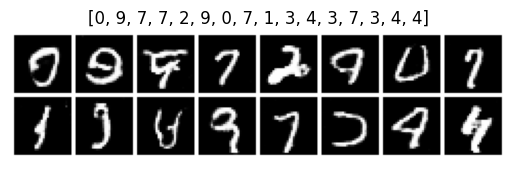

average prediction confidence over 1000 predictions: 0.6162525415420532
cumulative prediction counts: [10400, 5038, 6291, 11986, 5869, 5834, 3248, 14351, 8957, 14026]
epoch time: 16.422959089279175, total time: 1441.1388688087463
Epoch [87/100] Batch [1/469] Discriminator Loss: 0.7088 Generator Loss: 1.5130
Epoch [87/100] Batch [101/469] Discriminator Loss: 0.8541 Generator Loss: 1.2846
Epoch [87/100] Batch [201/469] Discriminator Loss: 0.6867 Generator Loss: 2.0003
Epoch [87/100] Batch [301/469] Discriminator Loss: 0.8178 Generator Loss: 2.1789
Epoch [87/100] Batch [401/469] Discriminator Loss: 0.7101 Generator Loss: 2.0833


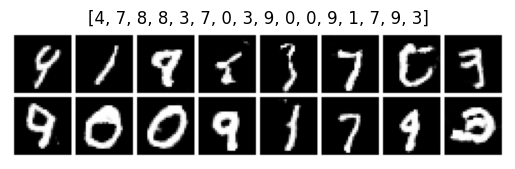

average prediction confidence over 1000 predictions: 0.6237867474555969
cumulative prediction counts: [10556, 5101, 6340, 12102, 5928, 5867, 3272, 14567, 9072, 14195]
epoch time: 17.11392855644226, total time: 1458.2527973651886
Epoch [88/100] Batch [1/469] Discriminator Loss: 0.6650 Generator Loss: 1.8690
Epoch [88/100] Batch [101/469] Discriminator Loss: 0.7393 Generator Loss: 1.9156
Epoch [88/100] Batch [201/469] Discriminator Loss: 0.6493 Generator Loss: 1.3091
Epoch [88/100] Batch [301/469] Discriminator Loss: 0.7681 Generator Loss: 1.7374
Epoch [88/100] Batch [401/469] Discriminator Loss: 0.9429 Generator Loss: 2.9993


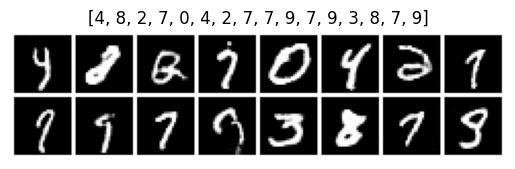

average prediction confidence over 1000 predictions: 0.6102073192596436
cumulative prediction counts: [10694, 5153, 6409, 12230, 5988, 5919, 3295, 14773, 9156, 14383]
epoch time: 16.530890226364136, total time: 1474.7836875915527
Epoch [89/100] Batch [1/469] Discriminator Loss: 0.7679 Generator Loss: 1.2132
Epoch [89/100] Batch [101/469] Discriminator Loss: 0.7894 Generator Loss: 1.8772
Epoch [89/100] Batch [201/469] Discriminator Loss: 0.6791 Generator Loss: 1.7873
Epoch [89/100] Batch [301/469] Discriminator Loss: 0.8747 Generator Loss: 2.0996
Epoch [89/100] Batch [401/469] Discriminator Loss: 0.7076 Generator Loss: 1.5788


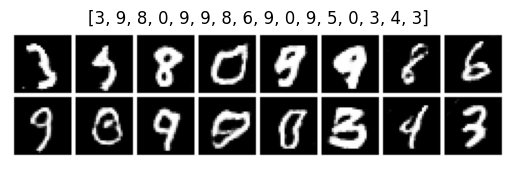

average prediction confidence over 1000 predictions: 0.5982250571250916
cumulative prediction counts: [10823, 5208, 6488, 12338, 6056, 5975, 3315, 14979, 9260, 14558]
epoch time: 16.68010926246643, total time: 1491.4637968540192
Epoch [90/100] Batch [1/469] Discriminator Loss: 0.8302 Generator Loss: 2.3887
Epoch [90/100] Batch [101/469] Discriminator Loss: 0.6548 Generator Loss: 1.5446
Epoch [90/100] Batch [201/469] Discriminator Loss: 0.9191 Generator Loss: 1.1611
Epoch [90/100] Batch [301/469] Discriminator Loss: 0.8161 Generator Loss: 2.3560
Epoch [90/100] Batch [401/469] Discriminator Loss: 0.7257 Generator Loss: 1.7243


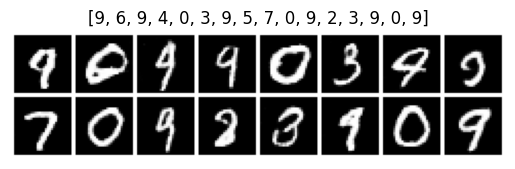

average prediction confidence over 1000 predictions: 0.6345952153205872
cumulative prediction counts: [10965, 5251, 6567, 12452, 6101, 6011, 3338, 15192, 9356, 14767]
epoch time: 16.95498299598694, total time: 1508.418779850006
Epoch [91/100] Batch [1/469] Discriminator Loss: 0.7524 Generator Loss: 1.2637
Epoch [91/100] Batch [101/469] Discriminator Loss: 0.6693 Generator Loss: 1.6016
Epoch [91/100] Batch [201/469] Discriminator Loss: 0.8951 Generator Loss: 1.3442
Epoch [91/100] Batch [301/469] Discriminator Loss: 0.7587 Generator Loss: 1.9743
Epoch [91/100] Batch [401/469] Discriminator Loss: 0.7272 Generator Loss: 1.9406


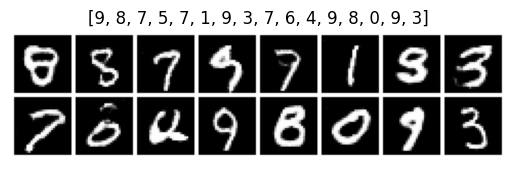

average prediction confidence over 1000 predictions: 0.6188404560089111
cumulative prediction counts: [11116, 5309, 6625, 12568, 6147, 6063, 3357, 15397, 9451, 14967]
epoch time: 16.894291877746582, total time: 1525.3130717277527
Epoch [92/100] Batch [1/469] Discriminator Loss: 0.6317 Generator Loss: 2.1993
Epoch [92/100] Batch [101/469] Discriminator Loss: 0.7567 Generator Loss: 1.5955
Epoch [92/100] Batch [201/469] Discriminator Loss: 0.8230 Generator Loss: 1.6799
Epoch [92/100] Batch [301/469] Discriminator Loss: 1.1134 Generator Loss: 0.9844
Epoch [92/100] Batch [401/469] Discriminator Loss: 0.6512 Generator Loss: 2.2013


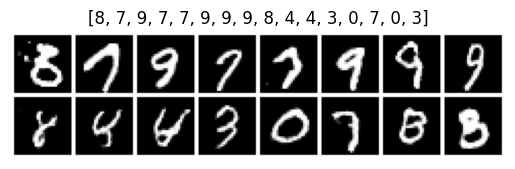

average prediction confidence over 1000 predictions: 0.6249626278877258
cumulative prediction counts: [11279, 5353, 6686, 12702, 6204, 6100, 3371, 15620, 9553, 15132]
epoch time: 16.784362316131592, total time: 1542.0974340438843
Epoch [93/100] Batch [1/469] Discriminator Loss: 0.8475 Generator Loss: 1.3403
Epoch [93/100] Batch [101/469] Discriminator Loss: 0.6664 Generator Loss: 2.4248
Epoch [93/100] Batch [201/469] Discriminator Loss: 0.7195 Generator Loss: 1.6464
Epoch [93/100] Batch [301/469] Discriminator Loss: 0.7612 Generator Loss: 1.5482
Epoch [93/100] Batch [401/469] Discriminator Loss: 0.8143 Generator Loss: 1.2427


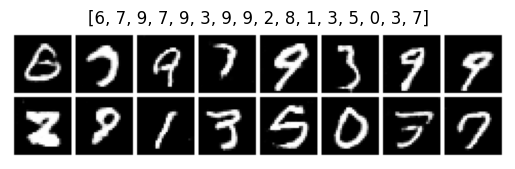

average prediction confidence over 1000 predictions: 0.6154243350028992
cumulative prediction counts: [11420, 5409, 6732, 12826, 6270, 6155, 3397, 15827, 9649, 15315]
epoch time: 16.402063608169556, total time: 1558.4994976520538
Epoch [94/100] Batch [1/469] Discriminator Loss: 0.7826 Generator Loss: 1.2967
Epoch [94/100] Batch [101/469] Discriminator Loss: 0.6615 Generator Loss: 2.3725
Epoch [94/100] Batch [201/469] Discriminator Loss: 0.7043 Generator Loss: 1.7297
Epoch [94/100] Batch [301/469] Discriminator Loss: 0.6552 Generator Loss: 2.4125
Epoch [94/100] Batch [401/469] Discriminator Loss: 0.6626 Generator Loss: 1.5222


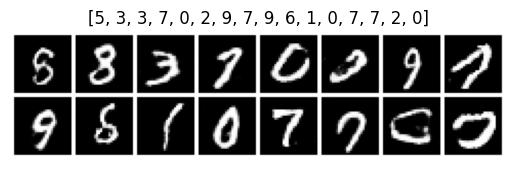

average prediction confidence over 1000 predictions: 0.6221951246261597
cumulative prediction counts: [11567, 5461, 6784, 12958, 6328, 6195, 3421, 16042, 9742, 15502]
epoch time: 17.885316848754883, total time: 1576.3848145008087
Epoch [95/100] Batch [1/469] Discriminator Loss: 0.8088 Generator Loss: 1.9387
Epoch [95/100] Batch [101/469] Discriminator Loss: 0.7448 Generator Loss: 1.4332
Epoch [95/100] Batch [201/469] Discriminator Loss: 0.7955 Generator Loss: 1.1424
Epoch [95/100] Batch [301/469] Discriminator Loss: 0.6401 Generator Loss: 1.8527
Epoch [95/100] Batch [401/469] Discriminator Loss: 0.7612 Generator Loss: 1.6390


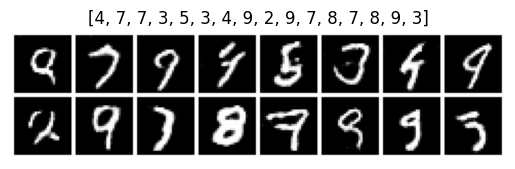

average prediction confidence over 1000 predictions: 0.6092491745948792
cumulative prediction counts: [11690, 5515, 6841, 13092, 6397, 6246, 3445, 16247, 9841, 15686]
epoch time: 16.98075294494629, total time: 1593.365567445755
Epoch [96/100] Batch [1/469] Discriminator Loss: 0.6819 Generator Loss: 1.9502
Epoch [96/100] Batch [101/469] Discriminator Loss: 0.8688 Generator Loss: 2.2356
Epoch [96/100] Batch [201/469] Discriminator Loss: 0.7496 Generator Loss: 1.8024
Epoch [96/100] Batch [301/469] Discriminator Loss: 0.7508 Generator Loss: 1.7931
Epoch [96/100] Batch [401/469] Discriminator Loss: 0.7700 Generator Loss: 1.9976


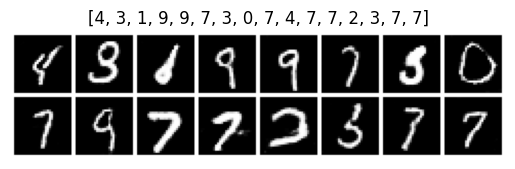

average prediction confidence over 1000 predictions: 0.6157869100570679
cumulative prediction counts: [11810, 5569, 6891, 13235, 6465, 6281, 3466, 16461, 9946, 15876]
epoch time: 17.30678367614746, total time: 1610.6723511219025
Epoch [97/100] Batch [1/469] Discriminator Loss: 0.7657 Generator Loss: 1.5321
Epoch [97/100] Batch [101/469] Discriminator Loss: 0.7243 Generator Loss: 1.6340
Epoch [97/100] Batch [201/469] Discriminator Loss: 0.6954 Generator Loss: 1.6397
Epoch [97/100] Batch [301/469] Discriminator Loss: 0.6926 Generator Loss: 1.7507
Epoch [97/100] Batch [401/469] Discriminator Loss: 0.6885 Generator Loss: 1.7349


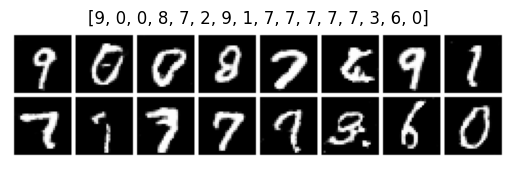

average prediction confidence over 1000 predictions: 0.623086154460907
cumulative prediction counts: [11968, 5616, 6936, 13353, 6525, 6327, 3482, 16683, 10048, 16062]
epoch time: 16.68023371696472, total time: 1627.3525848388672
Epoch [98/100] Batch [1/469] Discriminator Loss: 0.6663 Generator Loss: 1.8092
Epoch [98/100] Batch [101/469] Discriminator Loss: 0.7678 Generator Loss: 1.2462
Epoch [98/100] Batch [201/469] Discriminator Loss: 0.7836 Generator Loss: 2.0945
Epoch [98/100] Batch [301/469] Discriminator Loss: 0.8069 Generator Loss: 2.3160
Epoch [98/100] Batch [401/469] Discriminator Loss: 0.7133 Generator Loss: 2.2127


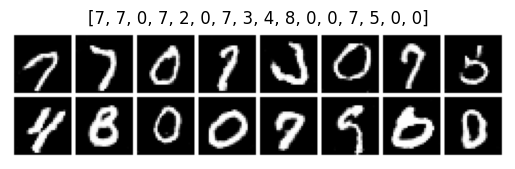

average prediction confidence over 1000 predictions: 0.6309325695037842
cumulative prediction counts: [12094, 5668, 6988, 13470, 6600, 6368, 3510, 16906, 10150, 16246]
epoch time: 17.067887544631958, total time: 1644.4204723834991
Epoch [99/100] Batch [1/469] Discriminator Loss: 0.7884 Generator Loss: 3.1279
Epoch [99/100] Batch [101/469] Discriminator Loss: 0.7048 Generator Loss: 1.6905
Epoch [99/100] Batch [201/469] Discriminator Loss: 0.8645 Generator Loss: 1.7011
Epoch [99/100] Batch [301/469] Discriminator Loss: 0.8830 Generator Loss: 3.1475
Epoch [99/100] Batch [401/469] Discriminator Loss: 0.7552 Generator Loss: 2.1595


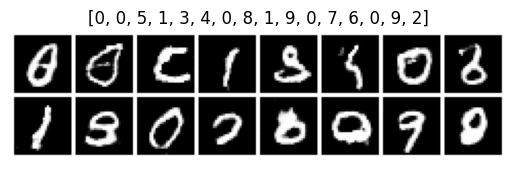

average prediction confidence over 1000 predictions: 0.6347478032112122
cumulative prediction counts: [12240, 5724, 7051, 13571, 6669, 6411, 3525, 17124, 10249, 16436]
epoch time: 16.67268967628479, total time: 1661.093162059784
Epoch [100/100] Batch [1/469] Discriminator Loss: 0.6387 Generator Loss: 2.1187
Epoch [100/100] Batch [101/469] Discriminator Loss: 0.7694 Generator Loss: 1.5425
Epoch [100/100] Batch [201/469] Discriminator Loss: 0.7992 Generator Loss: 1.6224
Epoch [100/100] Batch [301/469] Discriminator Loss: 0.6915 Generator Loss: 1.9513
Epoch [100/100] Batch [401/469] Discriminator Loss: 1.0207 Generator Loss: 3.2123


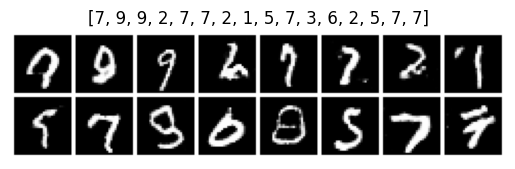

average prediction confidence over 1000 predictions: 0.6231281757354736
cumulative prediction counts: [12380, 5769, 7094, 13713, 6742, 6457, 3542, 17348, 10327, 16628]
epoch time: 16.944055795669556, total time: 1678.0372178554535


In [3]:
#OK now we have a good model for analyzing the output from our GAN
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set random seed for reproducibility
#torch.manual_seed(42)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.fc = nn.Linear(100, 7 * 7 * 128)
        self.conv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1)

        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 128, 7, 7)
        x = self.relu(self.conv1(x))
        x = self.tanh(self.conv2(x))
        return x

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.conv1 = nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.fc = nn.Linear(7 * 7 * 128, 1)

        self.relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = x.view(-1, 7 * 7 * 128)
        x = self.sigmoid(self.fc(x))
        return x

# Instantiate the generator and discriminator networks
generator = Generator()
discriminator = Discriminator()

# Define the loss function and optimizer
criterion = nn.BCELoss()
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Load the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Define the number of epochs and the device to use
num_epochs = 100
device = torch.device('cuda')

# Move the generator and discriminator networks to the device
generator.to(device)
discriminator.to(device)

# average of all confidences of predictions per epoch
confidences = []
counts = [0]*10
# Train the generator and discriminator networks
time_total = 0
for epoch in range(num_epochs):
    time_epoch = 0
    start = time.time()
    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.shape[0]
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Train the discriminator network
        discriminator_optimizer.zero_grad()
        real_images = real_images.to(device)
        real_outputs = discriminator(real_images)
        real_loss = criterion(real_outputs, real_labels)

        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images.detach())
        fake_loss = criterion(fake_outputs, fake_labels)

        discriminator_loss = real_loss + fake_loss
        discriminator_loss.backward()
        discriminator_optimizer.step()

        # Train the generator network
        generator_optimizer.zero_grad()
        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images)
        generator_loss = criterion(fake_outputs, real_labels)
        generator_loss.backward()
        generator_optimizer.step()

        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] Batch [{i+1}/{len(dataloader)}] '
                  f'Discriminator Loss: {discriminator_loss.item():.4f} '
                  f'Generator Loss: {generator_loss.item():.4f}')

    # Generate 100 samples and count how many of each digit 
    with torch.no_grad():
        # Define the fixed noise vector for generating samples
        sample_noise = torch.randn(1000, 100, device=device)
        generated_images = generator(sample_noise)
        generated_images = 0.5 * (generated_images + 1)
        output = model(generated_images)
        pred = output.argmax(dim=1, keepdim=True)
        grid = make_grid(generated_images[:16].cpu(), nrow=8, pad_value=1)
        plt.imshow(grid.permute(1, 2, 0))
        plt.axis('off')
        plt.title([int(pred[x]) for x in range(16)])
        plt.show()
        #print(torch.exp(output[0])) # torch.exp converts the output back into regular softmax probabilities (confidences)
        avg_conf = torch.mean(torch.exp(output).max(dim=1).values)
        confidences.append(avg_conf)
        for p in pred:
            counts[p] += 1

    time_epoch = time.time() - start
    time_total += time_epoch
    print(f"average prediction confidence over 1000 predictions: {avg_conf}")
    print(f"cumulative prediction counts: {counts}")
    print(f"epoch time: {time_epoch}, total time: {time_total}")
        

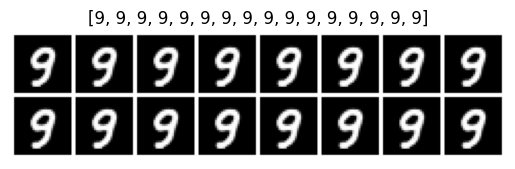

In [4]:
sample_noise = torch.zeros(1000, 100, device=device)
generated_images = generator(sample_noise)
generated_images = 0.5 * (generated_images + 1)
output = model(generated_images)
pred = output.argmax(dim=1, keepdim=True)
grid = make_grid(generated_images[:16].cpu(), nrow=8, pad_value=1)
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.title([int(pred[x]) for x in range(16)])
plt.show()
#print(torch.exp(output[0])) # torch.exp converts the output back into regular softmax probabilities (confidences)
avg_conf = torch.mean(torch.exp(output).max(dim=1).values)

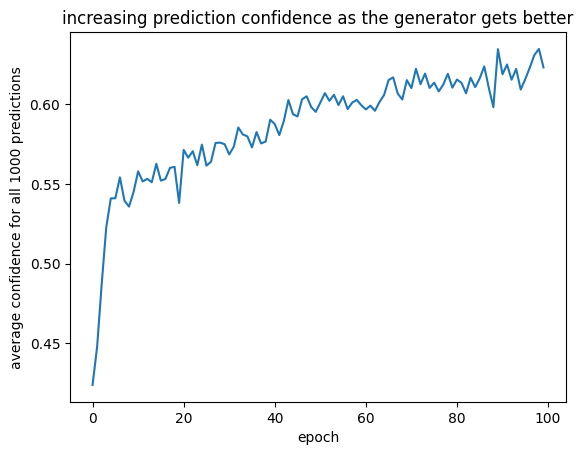

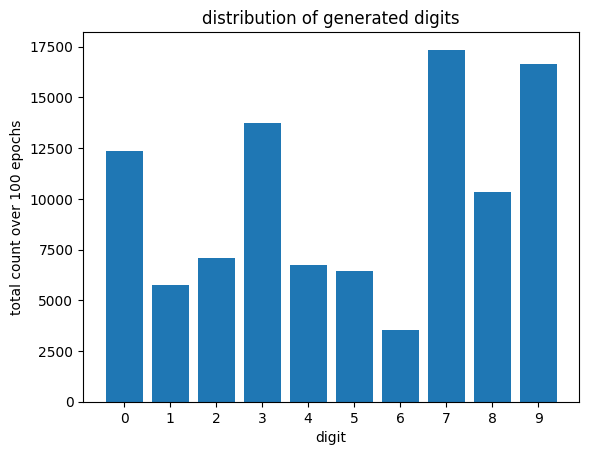

In [5]:
# now let's plot the average confidences in the predictions over the epochs
import matplotlib.pyplot as plt
plt.plot([float(c) for c in confidences])
plt.xlabel("epoch")
plt.ylabel("average confidence for all 1000 predictions")
plt.title("increasing prediction confidence as the generator gets better")
plt.show()

plt.bar([f"{x}" for x in range(10)], counts)
plt.xlabel("digit")
plt.ylabel("total count over 100 epochs")
plt.title("distribution of generated digits")
plt.show()